# Bool
закодировать
# Questions
result_name оставить нул?

# Импорт основных библиотек и датасета

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# graph
import networkx as nx
from pyvis.network import Network

In [2]:
PATHES = ["./with_closed_ations_as________select_app_2018_X5_STORES.csv", "./with_closed_ations_as________select_app_2019_X5_STORES.csv", "./with_closed_ations_as________select_app_2020_X5_STORES.csv"]
# df = pd.read_csv(PATH)
df = pd.DataFrame()
for path in PATHES:
    df1 = pd.read_csv(path)
    df = pd.concat([df, df1])
    
df['action_date'] = pd.to_datetime(df['action_date'])
df = df[df['position_name'] == 'Продавец-кассир']

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# изменение bool значений

In [3]:
df["is_active_action"] = df.is_active_action.replace({True: 1, False: 0})
df["is_open_action"] = df.is_open_action.replace({True: 1, False: 0})
df

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
0,3080432,2883423,-1,9044,2018-10-16 18:11:10.003180+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
1,2873477,2761171,-1,32087,2018-08-15 10:36:32.936322+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
2,2896621,2776555,-1,32087,2018-08-22 14:09:27.083354+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
3,2906437,2782282,-1,32087,2018-08-24 15:55:27.912704+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
4,2965200,2816229,-1,32087,2018-09-11 15:00:49.242929+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
...,...,...,...,...,...,...,...,...,...,...,...
739675,4825142,2952699,-1,32061,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739676,4736341,936507,-1,32061,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739678,4782853,2753502,-1,32110,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739679,4769924,3823657,-1,32110,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1


# Статистика

In [4]:
df = df[df['is_active_action'] == 1]

In [5]:
from functools import singledispatch
@singledispatch
def toDays(time_delta):
    return time_delta
@toDays.register
def _(time_delta: pd.Timedelta):
    return time_delta.total_seconds()/60/60/24
@toDays.register
def _(time_delta: pd.Series):
    return time_delta.dt.total_seconds()/60/60/24

In [6]:
# Сортируем по аппликантам и по времени
df.sort_values(by=['id_applicant','action_date'], ascending = [False,True], inplace = True)
df.reset_index(drop = True, inplace = True)

# action_time
indexes = pd.RangeIndex(len(df) - 1)
df['action_time'] = toDays(df.iloc[indexes + 1]['action_date'].reset_index(drop = True) - df['action_date']) # In days
df['action_time'].iloc[df[df['id_applicant'] !=  df.iloc[indexes+1].append({'id_applicant': 0}, ignore_index = True)['id_applicant'].reset_index(drop = True)].index] = None

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [7]:
df['is_fits'] = 0
df.loc[df['result_name'] == 'Принят', 'is_fits'] = 1
df['is_fits'].mean()

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0.018807529887609212

In [8]:
applicants_fits =  df.groupby(['id_applicant'])['is_fits'].sum()
applicants_fits.describe()

count    1.733977e+06
mean     1.161053e-01
std      3.206698e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+00
Name: is_fits, dtype: float64

In [9]:
df['id_applicant'][df['id_applicant'].isin(applicants_fits[applicants_fits > 2].index)].unique()
# Очень странные значения!!! Когда два раза принимают там в основном второе оформление - после выхода на работу
# Можете смотреть тут
# df[df['id_applicant'].isin([4041842])]

array([2859958], dtype=int64)

In [10]:
df_fits = df[df['id_applicant'].isin(applicants_fits[applicants_fits > 0].index)].reset_index()
df_fits = df_fits[df_fits['is_active_action'] == 1]
df_fits.describe()

,index,id_applicant,id_partner,id_log,department_id,is_active_action,is_open_action,action_time,is_fits
count,2.400247e+06,2.400247e+06,2.400247e+06,2.400247e+06,2.400247e+06,2400247.0,2.400247e+06,2.199099e+06,2.400247e+06
mean,5.329407e+06,3.280235e+06,2.709437e+06,1.577098e+07,2.203810e+04,1.0,6.249357e-06,1.191580e+00,8.387637e-02
std,2.899277e+06,6.037361e+05,6.683275e+05,5.887423e+06,1.214382e+04,0.0,2.499864e-03,7.970328e+00,2.772024e-01
min,0.000000e+00,2.196746e+06,5.305870e+05,-1.000000e+00,5.637000e+03,1.0,0.000000e+00,1.396991e-08,0.000000e+00
25%,2.808272e+06,2.775263e+06,2.497976e+06,1.347877e+07,1.008500e+04,1.0,0.000000e+00,1.080026e-05,0.000000e+00
50%,5.312441e+06,3.290447e+06,2.818420e+06,1.643617e+07,2.406800e+04,1.0,0.000000e+00,9.651384e-05,0.000000e+00
75%,7.814420e+06,3.759099e+06,3.181783e+06,1.967039e+07,3.217700e+04,1.0,0.000000e+00,7.662988e-01,0.000000e+00
max,1.070443e+07,4.886615e+06,3.897229e+06,2.710603e+07,4.985900e+04,1.0,1.000000e+00,8.111587e+02,1.000000e+00


In [11]:
len(df_fits['id_applicant'].unique())

201148

In [12]:
df_fits['Date_int'] = df_fits['action_date'].values.astype('int64')
partner_applicant =  df_fits.groupby(['id_partner','id_applicant'])['Date_int'].max().reset_index()
amount_applicant =  partner_applicant.groupby(['id_partner'])['Date_int'].max().reset_index()
partner_applicant = partner_applicant[partner_applicant['Date_int'].isin(amount_applicant['Date_int'])]
df_fits = pd.DataFrame(df_fits).drop(columns = 'Date_int')

df_fits = df_fits[df_fits['id_applicant'].isin(partner_applicant['id_applicant'])].reset_index(drop = True)

In [13]:
len(df_fits['id_applicant'].unique())

193767

In [14]:
# applicant_min =  df_fits.groupby(['id_applicant'])['action_date'].min().reset_index()
fits_max =  df_fits[df_fits['result_name'] == 'Принят'].groupby(['id_applicant'])['action_date'].max().reset_index()
fits_max

# unused for now
# new_tth = pd.DataFrame(applicant_min).drop(columns = 'action_date')
# new_tth['tth'] = toDays(fits_min['action_date'] - applicant_min['action_date'])

,id_applicant,action_date
0,2196746,2018-02-01 23:04:53.450437+00:00
1,2196747,2018-01-11 09:51:21.213384+00:00
2,2196748,2018-02-02 12:41:49.992103+00:00
3,2196752,2018-01-22 11:43:14.342473+00:00
4,2196753,2018-01-15 10:32:20.674998+00:00
...,...,...
193762,4886560,2020-04-14 11:04:44.553692+00:00
193763,4886575,2020-04-14 11:06:42.313671+00:00
193764,4886579,2020-04-14 11:07:06.756809+00:00
193765,4886599,2020-04-14 11:08:17.306195+00:00


In [15]:
df_fits.loc[df_fits['action_date'].isin(fits_max['action_date']) & (df_fits['action_time'].notna()), 'after_fit'] = 1
while True:
    after_indexes = df_fits[(df_fits['action_time'].notna())& (df_fits['after_fit'] == 1)].index
    after_fit_mask = (df_fits.index.isin(after_indexes + 1) & (df_fits['action_time'].notna())) & df_fits['after_fit'].isna()
    print(len(df_fits.loc[after_fit_mask]))
    if len(df_fits.loc[after_fit_mask]) == 0:
        break
    df_fits.loc[after_fit_mask, 'after_fit'] = 1

244
201
186
172
159
153
70
26
16
16
14
14
10
9
0


In [16]:
# partner_applicant =  df_fits.groupby(['id_partner','id_applicant']).size().reset_index()
# amount_applicant =  partner_applicant.groupby(['id_partner'])['id_applicant'].count().reset_index()
# partner_applicant.set_index('id_partner', inplace = True)
# amount_applicant[amount_applicant['id_applicant']>2]

# amount_applicant['id_partner'][amount_applicant['id_applicant']>2].array

In [17]:
# df_fits.loc[df_fits.index.isin(after_indexes + 1) & (df_fits['action_time'].notna()),'after_fit'] = 1
# ['after_fit']

In [18]:
df_fits.loc[df_fits['after_fit'] == 1, 'action_time'] = 0

In [19]:
df_fits[df_fits['id_applicant']== 4886560]

,index,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action,action_time,is_fits,after_fit
40,140,4886560,1197774,-1,35106,2020-04-14 11:04:14.792897+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0,0.000194,0,NaN
41,141,4886560,1197774,27105772,35106,2020-04-14 11:04:31.540786+00:00,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,1,0,0.000014,0,NaN
42,142,4886560,1197774,27105774,35106,2020-04-14 11:04:32.775293+00:00,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,1,0,0.000017,0,NaN
43,143,4886560,1197774,27105775,35106,2020-04-14 11:04:34.239576+00:00,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,1,0,0.000014,0,NaN
44,144,4886560,1197774,27105777,35106,2020-04-14 11:04:35.442680+00:00,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,1,0,0.000013,0,NaN
45,145,4886560,1197774,27105778,35106,2020-04-14 11:04:36.590168+00:00,СБ,Подготовить анкету кандидата,Подготовлена,Продавец-кассир,1,0,0.000011,0,NaN
46,146,4886560,1197774,27105779,35106,2020-04-14 11:04:37.511006+00:00,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,1,0,0.000015,0,NaN
47,147,4886560,1197774,27105781,35106,2020-04-14 11:04:38.764145+00:00,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,1,0,0.000017,0,NaN
48,148,4886560,1197774,27105783,35106,2020-04-14 11:04:40.266221+00:00,Оформление,Назначить время на оформление,Время назначено,Продавец-кассир,1,0,0.000050,0,NaN
49,149,4886560,1197774,27105784,35106,2020-04-14 11:04:44.553692+00:00,Оформление,Узнать результаты приема,Принят,Продавец-кассир,1,0,NaN,1,NaN


In [20]:
applicants_g =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time'].sum()
applicants_g.describe()

count    193767.000000
mean         13.005490
std          26.229788
min           0.000000
25%           4.304742
50%           7.926343
75%          14.194359
max         811.159243
Name: action_time, dtype: float64

In [21]:
# applicants_g =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time', 'is_fits'].sum()
# applicants_g[applicants_g['is_fits']>0].describe()

In [22]:
# applicants_g[applicants_g['is_fits']==0].describe()

In [23]:
# df['action_time'][df['action_time'] < 0] = None
stage_threshold = 0
stages_g =  df_fits.dropna(subset=['action_time']).groupby(['stage_name'])['action_time'].describe() # ['stage_name', 'activity_name']
stages_g[stages_g['count'] > stage_threshold]

,count,mean,std,min,25%,50%,75%,max
stage_name,,,,,,,,
Выход на работу,156.0,1.092758,2.533857,0.000000,0.000000,0.004903,1.224158,21.760230
Гайд-интервью,4.0,0.000011,0.000002,0.000009,0.000010,0.000011,0.000012,0.000013
Групповое собеседование и тестирование,6.0,0.000010,0.000002,0.000007,0.000009,0.000010,0.000012,0.000013
Интервью с руководителем,470750.0,0.563862,9.275355,0.000000,0.000008,0.000011,0.000015,811.158711
Кадровый резерв,4.0,0.000013,0.000011,0.000007,0.000008,0.000009,0.000014,0.000030
Мы отказали,22.0,0.308741,1.448064,0.000006,0.000008,0.000012,0.000015,6.792035
Назначение времени на оформление/медосмотр,205262.0,2.588660,6.868024,0.000000,0.000112,0.815712,3.013660,433.256890
Не прошел СБ,382.0,0.022709,0.211153,0.000000,0.000009,0.000011,0.000014,3.742623
Обработка,348531.0,0.172193,6.452844,0.000000,0.000009,0.000011,0.000014,565.056308


In [24]:
activity_threshold = 0
activities_g =  df_fits.dropna(subset=['action_time']).groupby(['activity_name'])['action_time'].describe()
activities_g[activities_g['count'] > activity_threshold]

,count,mean,std,min,25%,50%,75%,max
activity_name,,,,,,,,
Вернуть в воронку,8777.0,0.242731,2.267561e+00,0.000000,0.000062,0.000159,0.000346,113.246137
Вывести из черного списка,5.0,0.000208,1.429926e-04,0.000006,0.000114,0.000274,0.000297,0.000349
Назначить время для гайд-интервью,2.0,0.000012,7.476836e-07,0.000012,0.000012,0.000012,0.000012,0.000013
Назначить время на оформление,8211.0,1.034397,1.984597e+00,0.000022,0.000065,0.000233,1.043698,18.966384
Назначить время на оформление/медосмотр,218463.0,2.241734,5.549731e+00,0.000000,0.000132,0.226812,2.831923,433.256890
Назначить время на оформление/медосмотр (недозвон),124348.0,2.979320,7.469298e+00,0.000000,0.000076,0.828630,3.230943,392.058357
Назначить групповое собеседование и тестирование,2.0,0.000008,1.037589e-06,0.000007,0.000008,0.000008,0.000008,0.000009
Назначить интервью с руководителем,225710.0,0.626637,9.179090e+00,0.000000,0.000009,0.000011,0.000015,811.158711
Подготовить анкету кандидата,220390.0,1.376653,1.224314e+01,0.000000,0.000013,0.175961,0.832853,527.944208


In [25]:
result_threshold = 0
results_g =  df_fits.dropna(subset=['action_time']).groupby(['result_name'])['action_time'].describe()
results_g[results_g['mean'] > 1]

,count,mean,std,min,25%,50%,75%,max
result_name,,,,,,,,
В ожидании,153482.0,3.158289,5.908128,0.000000,1.016673,1.918097,3.894268,520.710384
Время назначено,191517.0,1.840695,4.353546,0.000000,0.000073,0.000276,2.811733,291.880512
Кадровый резерв,197.0,1.882064,7.805397,0.000008,0.000009,0.000011,0.000013,72.072166
Направлен на медосмотр,7438.0,4.059084,6.214250,0.000035,1.740861,2.116287,4.021579,148.137375
Не подходит,454.0,30.973591,49.373907,0.000021,9.190021,17.501866,32.610084,467.791808
Не получено,24.0,1.907678,2.560172,0.007971,0.077342,0.760203,2.788345,9.012896
Не принят,14.0,25.042870,38.841320,0.000000,7.308831,13.095907,28.450503,154.034348
Недозвон,143693.0,3.380745,9.124365,0.000000,0.249755,1.027225,3.153722,561.365339
Нет обратной связи,22849.0,3.343687,20.052129,0.000000,0.176681,0.923860,1.996873,532.894660


# Обнуляем время в результатах без предсказуемой последующей обработки

In [26]:
# Недозвон? Нет обратной связи? Ожидание?
results_empty = ['Резерв', 'Не подходит', 'Не принят', 'Отказ кандидата', 'Отказ руководителя', 'Принят', 'Кадровый резерв']
for res in results_empty:
    df_fits.loc[(df_fits['result_name'] == res) & df_fits['action_time'].notna(), 'action_time'] = 0
    
df_fits.loc[(df_fits['stage_name'] == 'Создание кандидата') & df_fits['action_time'].notna(), 'action_time'] = 0

In [27]:
df_tth =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant', 'id_partner', 'department_id'])['action_time'].sum().reset_index()
df_tth.rename(columns={"action_time": "TTH"}, inplace = True)
# df_tth['TTH'].to_excel('TTH.xlsx')
# df_tth = pd.merge(df_tth, df_fits[['id_applicant', 'id_partner']], how = 'right', on="id_applicant")
# df_tth = df_tth.join(df_fits.set_index('id_applicant')['id_partner'], on='id_applicant')
df_tth

,id_applicant,id_partner,department_id,TTH
0,2196746,2393754,6715,27.685659
1,2196747,2314693,12252,6.133310
2,2196748,2346300,5760,28.251127
3,2196752,2393757,32391,17.202996
4,2196753,2393758,32156,10.153854
...,...,...,...,...
193762,4886560,1197774,35106,0.000151
193763,4886575,1542748,28162,0.000176
193764,4886579,3878216,10530,0.000182
193765,4886599,3884467,48259,0.000218


In [28]:
df_tth_dep =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant', 'department_id'])['action_time'].count().reset_index()
# df_tth_dep = df_tth_dep.join(df_tth.set_index('id_applicant'), on='id_applicant')
# df_tth_dep = pd.merge(df_tth_dep, df_tth[['id_applicant','action_time']], how = 'left', on="id_applicant")
df_tth_dep = df_tth_dep.groupby(['department_id']).agg({'id_applicant':'count', 'action_time':'median'}).reset_index()
# df_tth_dep.to_excel('TTH_DEP.xlsx')
df_tth_dep.rename(columns={"id_applicant": "applicants","action_time": "TTH_median"}, inplace = True)
df_tth_dep

,department_id,applicants,TTH_median
0,5637,10,9.5
1,5638,4,9.0
2,5639,20,12.0
3,5640,6,12.5
4,5641,8,9.0
...,...,...,...
15545,49707,2,13.5
15546,49711,9,9.0
15547,49722,5,9.0
15548,49734,2,9.0


In [29]:
df_fits['place'] = range(0, len(df_fits))
df_places = df_fits.groupby(['id_applicant'])['place'].min().reset_index()
df_places = df_places.rename(columns={"place": 'place_min'})
df_fits = pd.merge(df_fits, df_places, how = 'left', on="id_applicant")
df_fits['place'] = df_fits['place'] - df_fits['place_min']
df_fits = df_fits.drop(['place_min'] , axis=1)

df_fits = pd.merge(df_fits, df_tth[['id_applicant', 'TTH']], how = 'left', on="id_applicant")

In [30]:
from sklearn.ensemble import IsolationForest

print(len(df_tth['id_partner'].unique()))
print(len(df_tth['id_applicant'].unique()))
df_tth = df_tth[df_tth['TTH'] >0.1]
forest_model=IsolationForest(random_state=0, contamination=.01).fit(df_tth[['TTH']])
df_tth['anomaly'] = forest_model.predict(df_tth[['TTH']])
df_tth
# df_fits

193767
193767


C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,id_applicant,id_partner,department_id,TTH,anomaly
0,2196746,2393754,6715,27.685659,1
1,2196747,2314693,12252,6.133310,1
2,2196748,2346300,5760,28.251127,1
3,2196752,2393757,32391,17.202996,1
4,2196753,2393758,32156,10.153854,1
...,...,...,...,...,...
193390,4874547,3857100,35046,2.984132,1
193391,4874561,3843493,24135,2.981270,1
193398,4874899,3847746,45624,2.944752,1
193399,4875075,3873082,9996,2.186676,1


In [31]:
df_tth['TTH'][(df_tth['anomaly']==-1)].describe()

count    1649.000000
mean      218.191364
std       118.304983
min        93.861059
25%       123.612238
50%       175.113743
75%       283.960668
max       626.053685
Name: TTH, dtype: float64

In [32]:
def SetTTHLabels(table_name = 'TTH'):
    ax.set_title(table_name)
    ax.set_xlabel('TTH (Дни)')
    ax.set_ylabel('Количество')

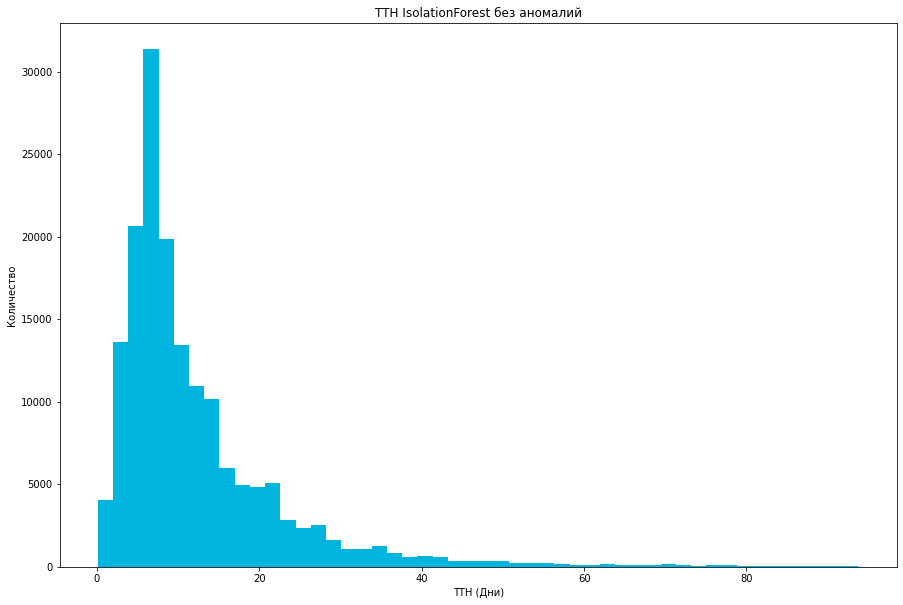

In [33]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
bins = 50
ax.hist(df_tth['TTH'][(df_tth['anomaly']==1)&(df_tth['TTH']>0.1)],bins=bins, color = "#00b5dd")
SetTTHLabels('TTH IsolationForest без аномалий')
plt.show()

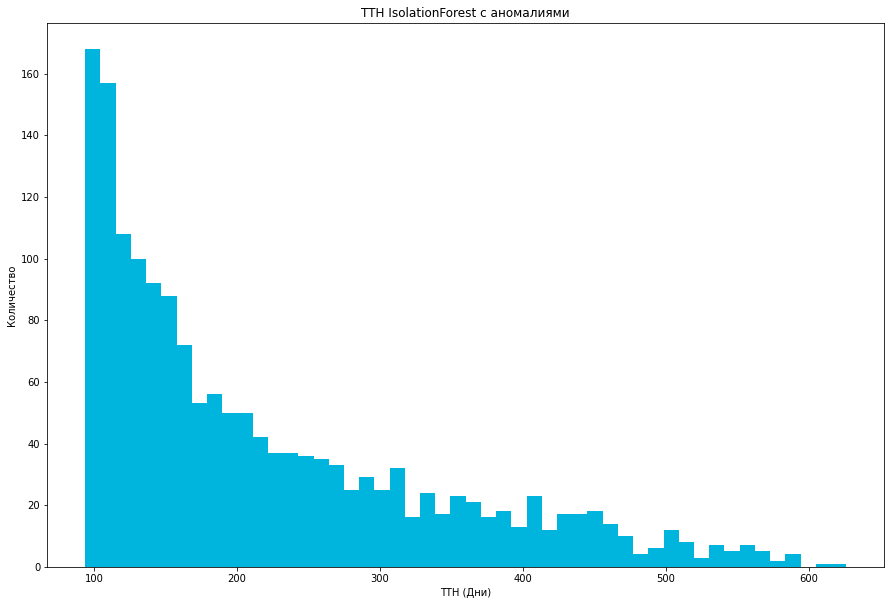

In [34]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
bins = 50
ax.hist(df_tth['TTH'][(df_tth['anomaly']==-1)&(df_tth['TTH']<1000)],bins=bins, color = "#00b5dd")
SetTTHLabels('TTH IsolationForest с аномалиями')
plt.show()

In [35]:
# Запускать один раз!
treshold_down = 0.02
treshold_up = df_tth['TTH'].quantile(0.99)
print("Верхняя граница = "+ str(treshold_up))
df_norm = df_fits.loc[df_fits['id_applicant'].isin(df_tth.loc[df_tth['anomaly']==1, 'id_applicant'])]
df_norm = df_norm.loc[df_norm['id_applicant'].isin(df_tth.loc[df_tth['TTH'] >0.1, 'id_applicant'])]
df_tth = pd.DataFrame(df_tth).drop(columns = 'anomaly')
print(len(df_norm))
# df_norm = pd.DataFrame(df_norm).drop(columns = 'anomaly')

df_tth_norm = df_tth.loc[df_tth['id_applicant'].isin(df_norm['id_applicant'])]
# df_tth_small = df_tth[(df_tth['TTH']<treshold_down)]

# df_norm = df_fits[(df_fits['TTH']<treshold_up)&(df_fits['TTH']>treshold_down)]
# df_small = df_fits[(df_fits['TTH']<treshold_down)]

Верхняя граница = 93.02681978548368
2043408


In [36]:
print("Количество норм аппликантов = "+ str(len(df_norm.id_applicant.unique())))
# print("Количество коротких аппликантов = "+ str(len(df_small.id_applicant.unique())))

Количество норм аппликантов = 164271


In [37]:
df_norm

,index,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action,action_time,is_fits,after_fit,place,TTH
3660,23065,4879878,3411802,-1,25070,2020-04-13 09:54:11.130665+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0,0.000000,0,NaN,0,0.327678
3661,23066,4879878,3411802,27071332,25070,2020-04-13 09:54:32.426053+00:00,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,1,0,0.000013,0,NaN,1,0.327678
3662,23067,4879878,3411802,27071333,25070,2020-04-13 09:54:33.513812+00:00,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,1,0,0.000014,0,NaN,2,0.327678
3663,23068,4879878,3411802,27071334,25070,2020-04-13 09:54:34.747243+00:00,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,1,0,0.000012,0,NaN,3,0.327678
3664,23069,4879878,3411802,27071335,25070,2020-04-13 09:54:35.803771+00:00,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,1,0,0.000011,0,NaN,4,0.327678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318758,10704425,2196746,2393754,10894251,6715,2018-01-09 09:27:48.426849+00:00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр,Время назначено,Продавец-кассир,1,0,7.332564,0,NaN,6,27.685659
2318759,10704426,2196746,2393754,11063771,6715,2018-01-16 17:26:41.952795+00:00,Оформление,Узнать результаты приема,В ожидании,Продавец-кассир,1,0,2.021458,0,NaN,7,27.685659
2318760,10704427,2196746,2393754,11114834,6715,2018-01-18 17:57:35.949129+00:00,Оформление,Узнать результаты приема,В ожидании,Продавец-кассир,1,0,7.920533,0,NaN,8,27.685659
2318761,10704428,2196746,2393754,11256014,6715,2018-01-26 16:03:09.962365+00:00,Оформление,Узнать результаты приема,В ожидании,Продавец-кассир,1,0,6.292864,0,NaN,9,27.685659


In [38]:
df_norm.groupby(['result_name'])['place'].mean().sort_values()

result_name
Источник не Яндекс Цифра                    2.108960
Источник Яндекс Цифра                       2.120000
Кадровый резерв                             2.476684
Встреча назначена                           4.041557
Перенос руководителя                        4.515152
Подходит                                    4.885506
Перенос кандидата                           4.897891
Нет обратной связи                          5.235389
Не подготовлена                             5.400000
Не подходит                                 5.823529
Согласование повторного приема              5.875491
Уточнение данных                            6.120968
Подготовлена                                6.147729
Резерв                                      6.185000
Перенос звонка                              6.266004
Не получено                                 6.375000
Не резерв                                   6.543662
Интервью с руководителем                    6.761798
Получено                          

In [39]:
df_norm.groupby(['stage_name'])['place'].mean().sort_values()

stage_name
Создание кандидата                             0.063815
Обработка                                      2.119257
Интервью с руководителем                       4.615842
Не прошел СБ                                   6.895899
СБ                                             7.150648
Резерв                                         7.155080
Кадровый резерв                                8.000000
Назначение времени на оформление/медосмотр     8.301236
Смена вакансии                                 9.397790
Мы отказали                                    9.863636
Ожидание                                      10.091268
Оформление                                    10.380049
Отказался                                     11.370479
Выход на работу                               11.402390
Name: place, dtype: float64

In [40]:
df_norm.groupby(['activity_name'])['place'].mean().sort_values()

activity_name
Провести первичную обработку                                 1.030529
Проверка источника                                           2.117320
Назначить интервью с руководителем                           4.044397
Узнать результаты интервью с руководителем                   5.137452
Подготовить анкету кандидата                                 6.144098
Проверка формы обращения                                     6.539384
Получить согласование повторного приема и отправить в СБ     6.911055
Вывести из черного списка                                    7.000000
Узнать результаты СБ                                         7.166016
Назначить время на оформление                                7.411099
Назначить время на оформление/медосмотр                      8.735783
Предоставить обратную связь по кандидату                     8.741039
Назначить время на оформление/медосмотр (недозвон)           8.967553
Узнать результаты медосмотра                                 9.760915
Вернут

In [41]:
def vizScatTTH(df, xColumns, yColumn,  x_c, y_c):
    fig, axs = plt.subplots( y_c, x_c, figsize=(15,15))
    df = df[df[yColumn] <82]
    i = 0
    for column in xColumns:
        x = int(i / x_c)
        y = i % x_c    
        axs[x,y].set_ylabel("TTH")
        axs[x,y].set_xlabel(column)
        axs[x,y].scatter(df[column],df[yColumn],s=3, label="original")
        i += 1
    plt.show()

def columnDiscraber(df, column_name, x_col, y_col):
    activites =  df.groupby([column_name])['place'].mean().sort_values().reset_index()[column_name].values

    df_activity_mean = df.groupby([column_name, 'id_applicant'])['action_time'].mean().sort_values().reset_index()
    df_activity_mean = df_activity_mean.loc[df_activity_mean[column_name].isin(activites)]

    temp_df = pd.get_dummies(df_activity_mean[column_name]).rename(columns=lambda x: str(x))
    df_activity_mean =  pd.concat((df_activity_mean, temp_df), axis=1)

    for activity in activites:
        df_activity_mean.loc[df_activity_mean[activity]==1, activity] = df_activity_mean['action_time'] 
    df_activity_mean.fillna(0)
    df_activity_mean = df_activity_mean.groupby(['id_applicant']).sum().reset_index()
    df_activity_mean = df_activity_mean.rename(columns={"action_time": 'TTH'})
    vizScatTTH(df_activity_mean, activites,'TTH', x_col, y_col)

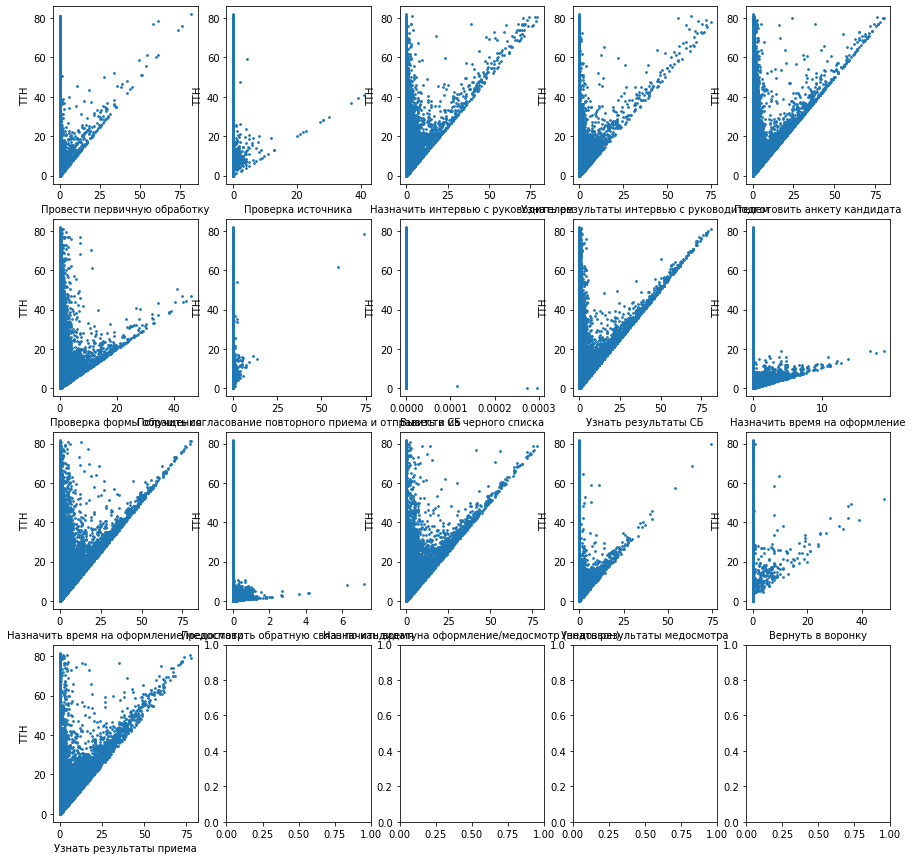

In [42]:
columnDiscraber(df_norm, 'activity_name', 5, 4)

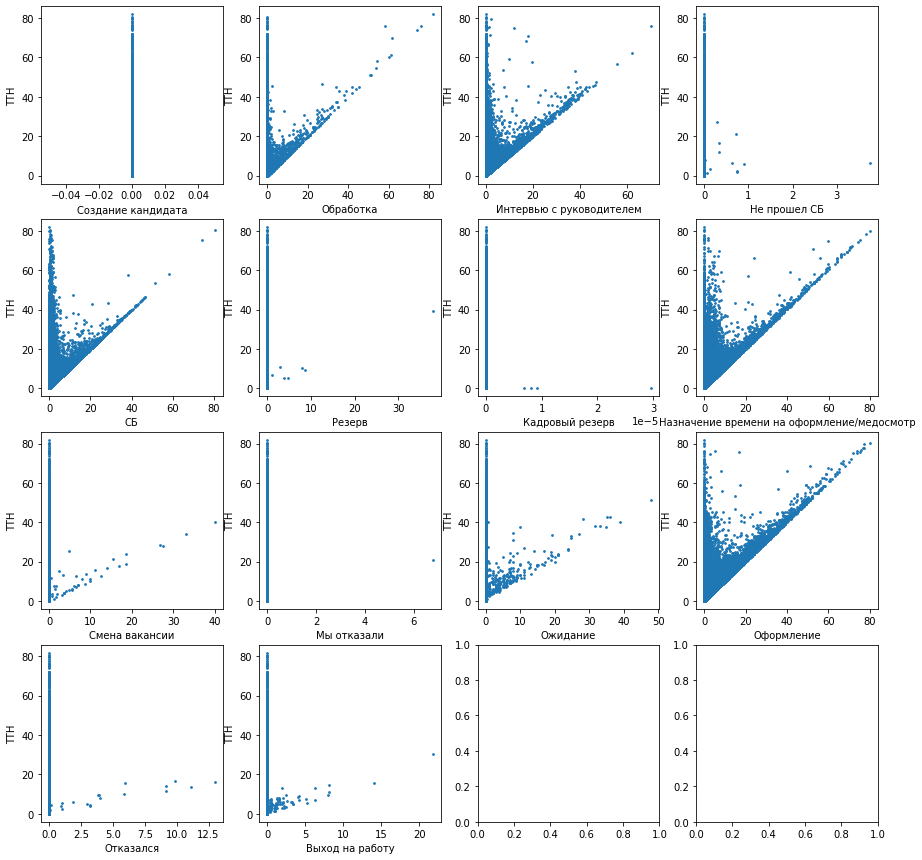

In [43]:
columnDiscraber(df_norm, 'stage_name', 4, 4)

In [44]:
# df_norm[df_norm['activity_name'] == 'Назначить время на оформление/медосмотр']
# df_test_g = df_norm[df_norm['activity_name'] == 'Назначить время на оформление/медосмотр'].groupby(['id_applicant','activity_name']).index.count().reset_index()
# df_test_g[df_test_g['index']>2]

In [45]:
def dfAllDays(df):
    date_min = df['action_date'].min().tzinfo.localize(pd.to_datetime(20180101, format='%Y%m%d'))
    day_max = int(toDays(df['action_date'].max() - date_min)) + 1 # In days
    range_days = range(0, day_max)
    return pd.DataFrame(range_days, range_days, columns =['days']) 
    
    
    
def stageInDays(stage_action_name, df, show_scatter = True, up_date_treshold = 730, applicants = False):
#     stage_date = df[df['stage_name'] == stage_action_name].groupby(['id_applicant'])['action_date'].max().reset_index()
    stage_date = df[df['stage_name'] == stage_action_name].groupby(['id_applicant']). agg({'action_date': 'max','action_time':'sum'}).reset_index()
#     stage_date = df.loc[df['action_date'].isin(stage_date['action_date']), ['id_applicant','action_date','action_time']]
    stage_date = stage_date.rename(columns={"action_date": 'max_date'})
    stage_date = pd.merge(stage_date,df[df['stage_name'] == stage_action_name].groupby(['id_applicant'])['action_date'].min().reset_index(), how = 'left', on="id_applicant")
    stage_date = stage_date.rename(columns={"action_date": 'min_date'})

    date = stage_date['min_date'].min().tzinfo.localize(pd.to_datetime(20180101, format='%Y%m%d'))
#     date_20 = stage_date['min_date'].min().tzinfo.localize(pd.to_datetime(20200101, format='%Y%m%d'))
#     print(toDays(date_20 - date))# - toDays(stage_date['min_date'].min() - date))
    
    stage_date['stage_time_min'] = (toDays(stage_date['min_date'] - date)).astype(int) # In days
    stage_date['stage_time_max'] = (toDays(stage_date['max_date'] - date)).astype(int) # In days
#     stage_date.sort_values(by=['stage_time_min'], ascending=[False])

    applicant_days = dfAllDays(df)
    applicant_days['applicants'] = 0
    for cur_date in applicant_days['days']:
        applicant_days.loc[cur_date,'applicants'] = len(stage_date[(stage_date['stage_time_max']>= cur_date)&(stage_date['stage_time_min']<= cur_date)])
    applicant_days = applicant_days[applicant_days['days'] < up_date_treshold]
    
    stage_date = pd.merge(stage_date, applicant_days.rename(columns={"days": 'stage_time_min'}), how = 'left', on="stage_time_min")
    if show_scatter:
        plt.subplots(figsize=(15,10))
        plt.scatter(applicant_days['days'], applicant_days['applicants'], linewidth=1, label="original",s=5)
        plt.title("Стадия "+ stage_action_name)
        plt.xlabel('Дни с начала 2018 года')
        plt.ylabel('Количество аппликантов на стадии')
        plt.grid(True)
        plt.show()
    if applicants:
        return applicant_days, stage_date
    else:
        return stage_date

In [46]:
# stageInDaysTTH('Оформление', df_norm, False, 9999, False)

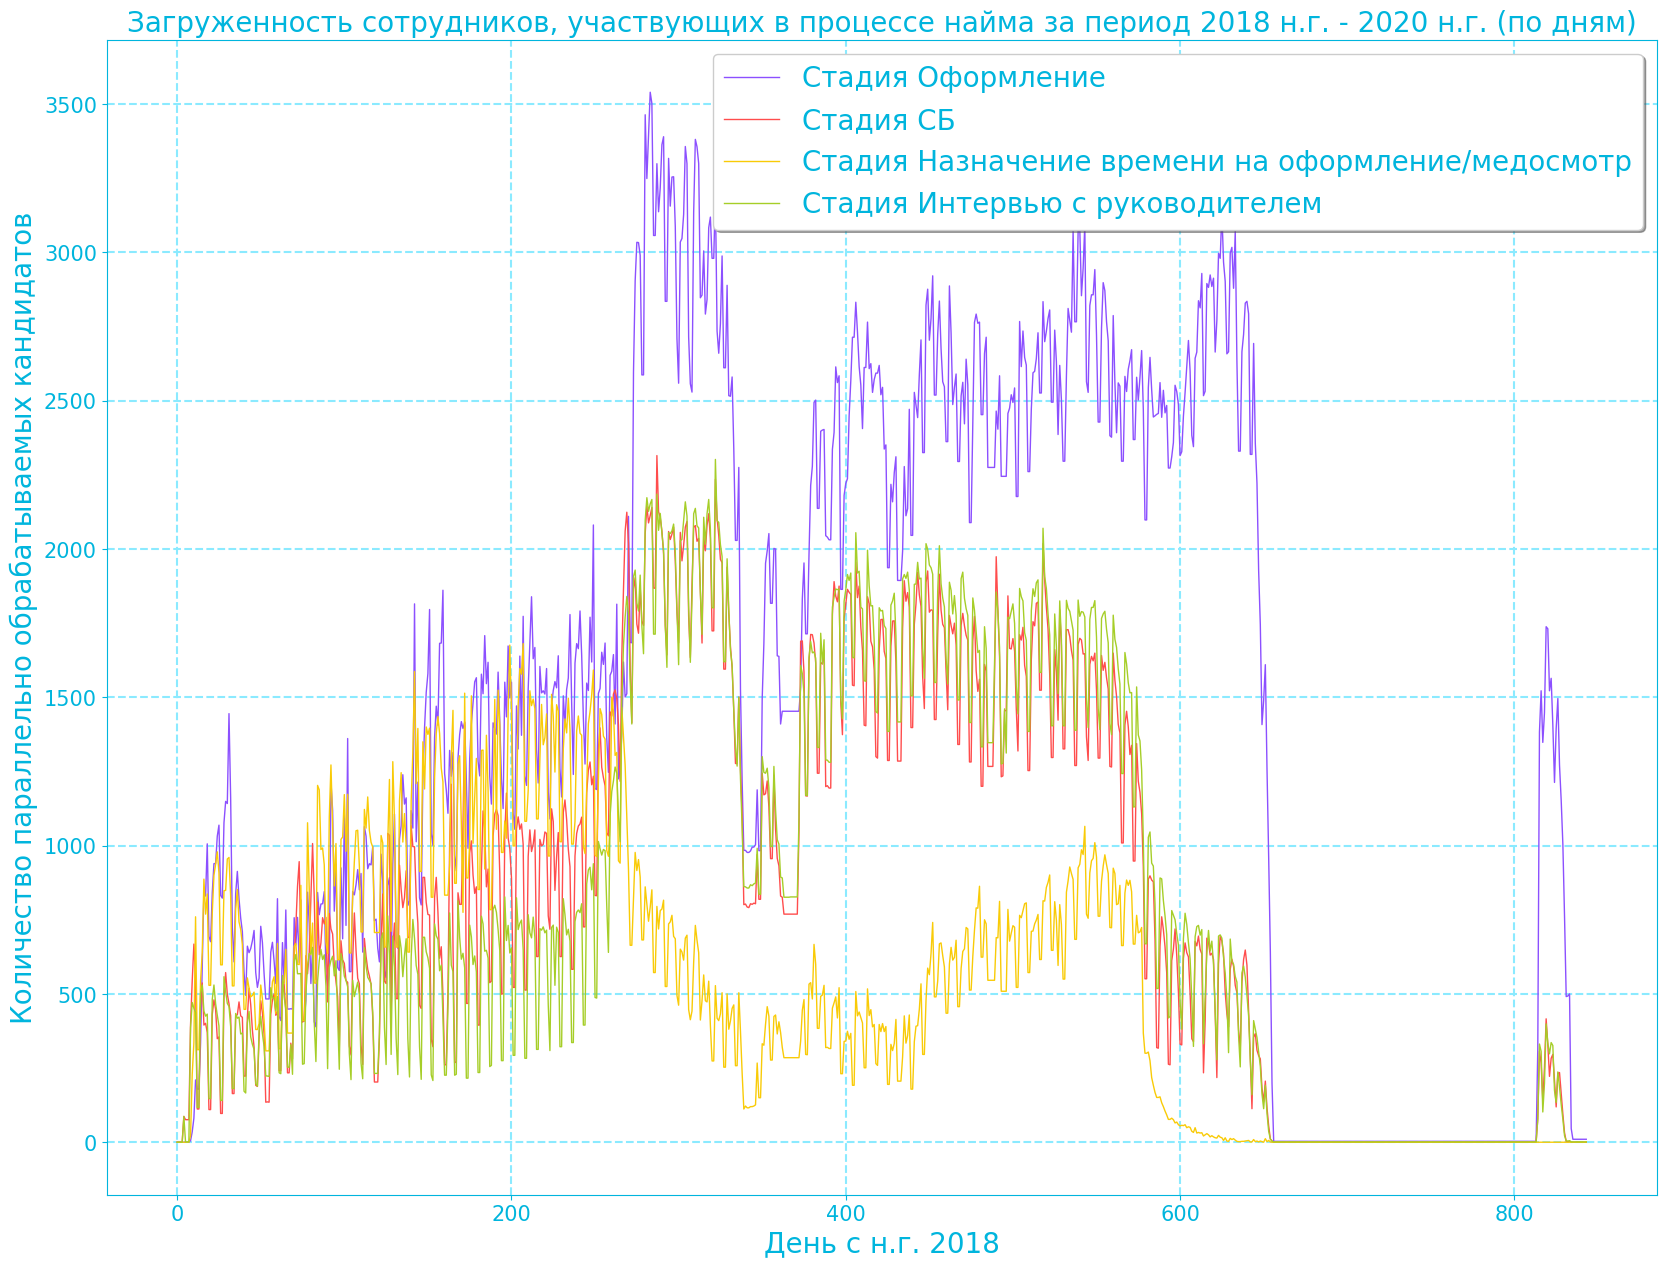

In [150]:
long_stages = ['Оформление', 'СБ', 'Назначение времени на оформление/медосмотр', 'Интервью с руководителем']
colors = ['#00b5dd','#8c50ff', '#ff4d4d', '#f9cb07', '#a6ce28']
grid_color = '#8beaff'
# for stage in long_stages:
#     stageInDays(stage, df_norm, True, 9999)
df_long_stages = dfAllDays(df_norm)
df_applicant_stages = pd.DataFrame(df_norm['id_applicant'].unique(), columns = ['id_applicant'])

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 15, 'text.color': colors[0],
                     'axes.labelcolor': colors[0], 'xtick.color': colors[0], 'ytick.color': colors[0],
                     'axes.edgecolor': colors[0], 'ytick.color': colors[0]})

plt.subplots(figsize=(20,15))
i = 1
for stage in long_stages:
    df_long_stage, df_applicant_stage = stageInDays(stage, df_norm, False, 9999, True)
    df_long_stages = pd.merge(df_long_stages, df_long_stage, how = 'left', on="days") 
    new_col_name = stage + ' аппликатнов'
    df_long_stages =  df_long_stages.rename(columns={"applicants": new_col_name})
    plt.plot(df_long_stages['days'], df_long_stages[new_col_name], label="Стадия " + stage, linewidth=1.0, color = colors[i])
    i += 1
    df_applicant_stages = pd.merge(df_applicant_stages, df_applicant_stage[['id_applicant', 'action_time', 'applicants']], how = 'left', on="id_applicant")
    df_applicant_stages =  df_applicant_stages.rename(columns={"applicants": new_col_name, 'action_time':stage+' время'}) 
    
df_applicant_stages = pd.merge(df_applicant_stages, df_tth[['id_applicant', 'TTH']], how = 'left', on="id_applicant") 
plt.title("Загруженность сотрудников, участвующих в процессе найма за период 2018 н.г. - 2020 н.г. (по дням)",
              fontsize = 20, color = colors[0])
plt.xlabel('День с н.г. 2018',
              fontsize = 20, color = colors[0])
plt.ylabel('Количество параллельно обрабатываемых кандидатов',
              fontsize = 20, color = colors[0])
plt.legend(loc='best',fancybox=True, shadow=True,
              fontsize = 20)
plt.grid(True)
plt.grid(linewidth = 1.5, ls ='--', color = grid_color)

# plt.spines.set_color('red')
# plt.xaxis.label.set_color('red')
# plt.tick_params(axis='x', colors='red')
        
# plt.show() 
plt.savefig('days_zagruz.png')
# df_long_stages.to_excel('LONG_STAGES.xlsx')
# df_long_stages

In [151]:
date_min = df_norm['action_date'].min().tzinfo.localize(pd.to_datetime(20180101, format='%Y%m%d'))
df_norm['days'] = (toDays(df_norm['action_date'] - date_min)).astype(int)  
df_norm = pd.merge(df_norm, df_long_stages, how = 'left', on="days")

In [152]:
df_applicant_stages = pd.merge(df_applicant_stages, df_norm[['id_applicant', 'days']], how = 'left', on="id_applicant")

In [138]:
# df_long_stages.sort_values(by =['days'])
# all_column_stages = []
# for stage in long_stages:
#     all_column_stages.append(stage+' время')
#     all_column_stages.append(stage+ ' аппликатнов')
# df_applicant_stages = df_applicant_stages.groupby(['days']).sum()
# vizScatTTH(df_applicant_stages, all_column_stages, 'TTH',  2, 4)
# df_applicant_stages.to_excel('stage_group.xlsx')

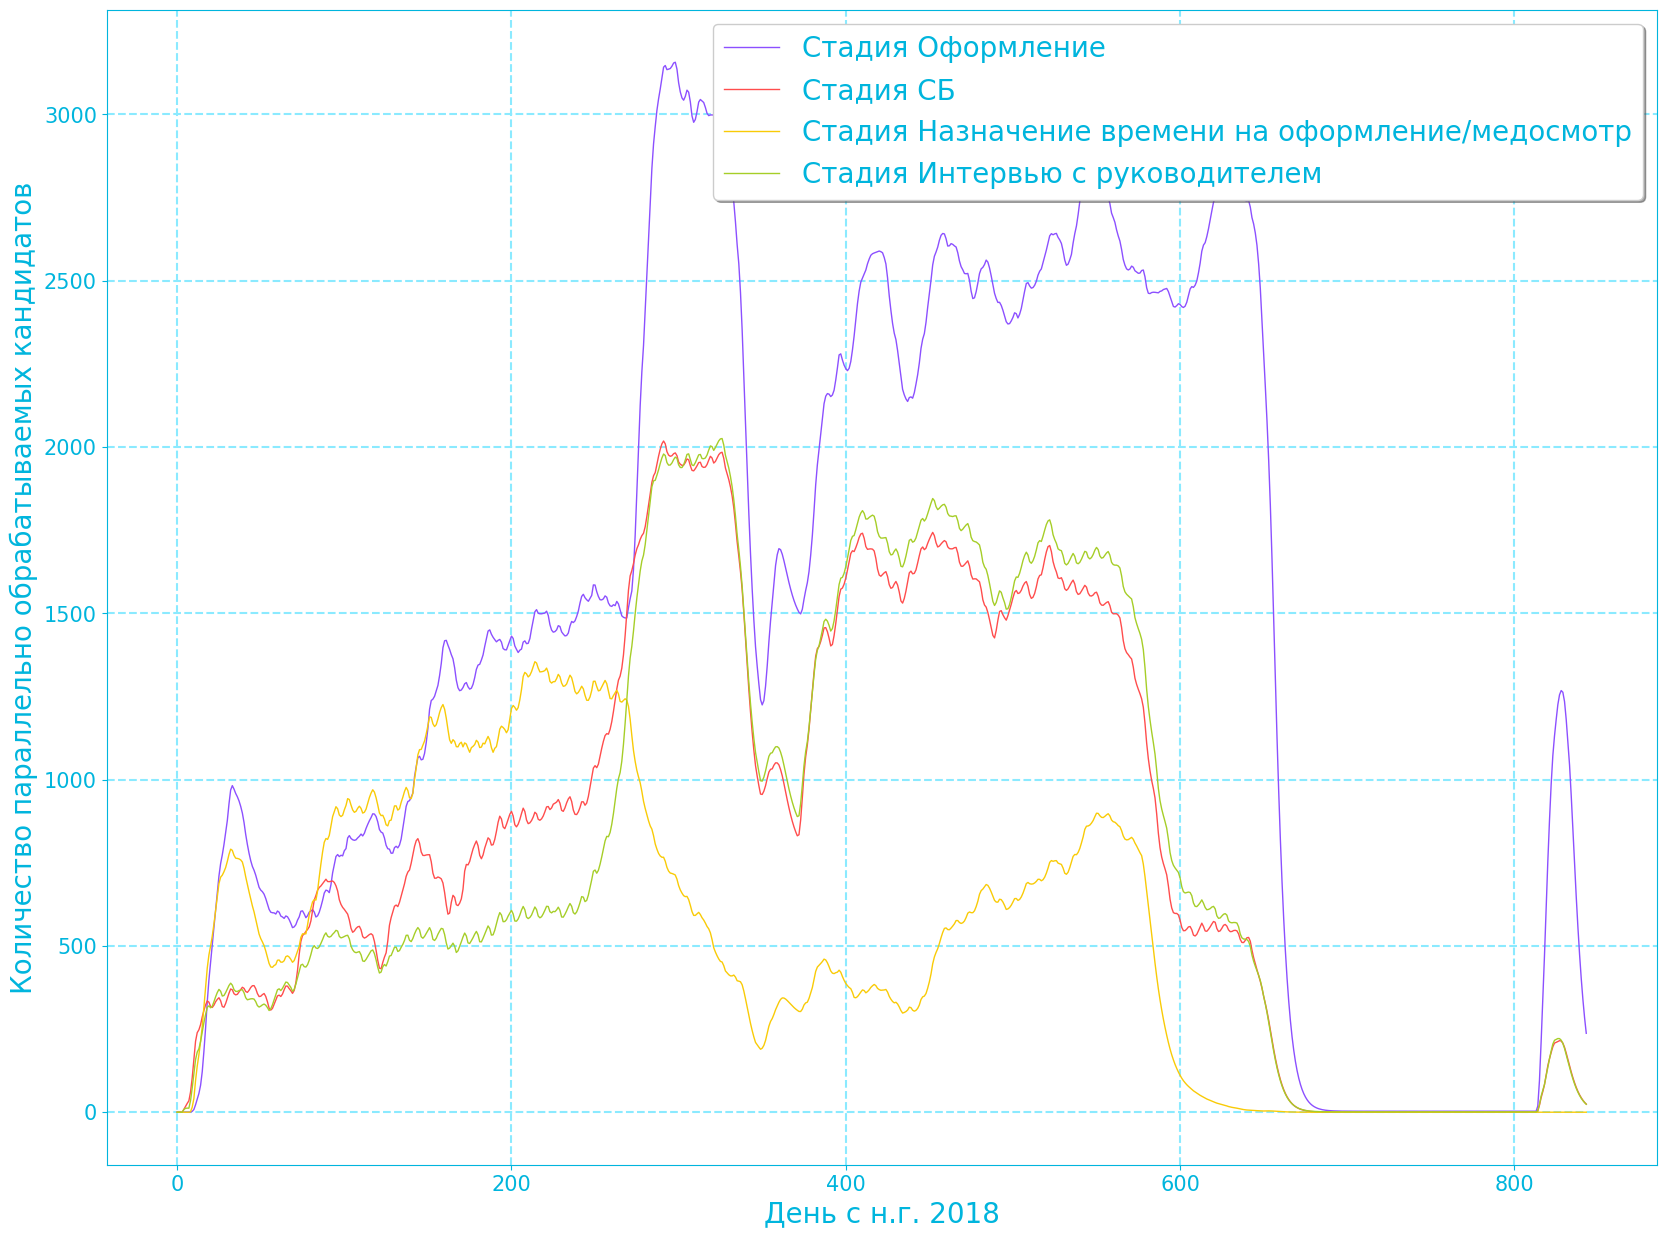

In [154]:
mask = np.isin(df_long_stages.columns, ['days'], invert = True)
df_long_stages_col = df_long_stages.columns[mask]
df_long_stages[df_long_stages_col] = df_long_stages[df_long_stages_col].ewm(com=3.5).mean()

i = 1
plt.subplots(figsize=(20,15))
for stage in long_stages:
    new_col_name = stage+ ' аппликатнов'
    df_long_stages =  df_long_stages.rename(columns={"applicants": new_col_name})
    plt.plot(df_long_stages['days'], df_long_stages[new_col_name], label="Стадия " + stage, linewidth=1.0, color = colors[i])
#     ,s=1, linewidth=1
    i += 1
# plt.title("Загруженность сотрудников, участвующих в процессе найма за период 2018 н.г. - 2020 н.г. (Среднее по неделе)",
#               fontsize = 20)
plt.xlabel('День с н.г. 2018',
              fontsize = 20)
plt.ylabel('Количество параллельно обрабатываемых кандидатов',
              fontsize = 20)
plt.legend(loc='best',fancybox=True, shadow=True,
              fontsize = 20)
plt.grid(True)
plt.grid(linewidth = 1.5, ls ='--', color = grid_color)
# plt.show() 
plt.savefig('weeks_zagruz.png')

# df_long_stages.to_excel('LONG_STAGES_MEAN(week).xlsx')

In [52]:
df_long_stages.sort_values(by =['days'])

,days,Оформление аппликатнов,СБ аппликатнов,Назначение времени на оформление/медосмотр аппликатнов,Интервью с руководителем аппликатнов
0,0,0.000000,0.000000,0.000000e+00,0.000000
1,1,0.000000,0.000000,0.000000e+00,0.000000
2,2,0.000000,0.000000,0.000000e+00,0.000000
3,3,0.000000,0.000000,0.000000e+00,0.000000
4,4,0.000000,27.025567,0.000000e+00,27.025567
...,...,...,...,...,...
839,839,186.563835,16.060368,2.371183e-20,15.842336
840,840,147.327427,12.491397,1.844254e-20,12.544039
841,841,116.810221,9.715531,1.434419e-20,9.978697
842,842,93.074617,7.556524,1.115660e-20,7.983431


In [53]:

# df_fits.sort_values(by =['days'])

In [155]:
def addTimeToDF(df, column_name, result_name, new_res_name, temp):
    temp = df[df[column_name]==result_name]
    temp = temp.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time'].sum().reset_index()
    temp = temp.rename(columns={"action_time": new_res_name})
    df = pd.merge(df, temp, how = 'left', on="id_applicant")
    df.fillna(value = {new_res_name:0}, inplace = True)
    return df
def dfMeanTime(df, column_name, result, result_new_name):
    df_mean = df[df[column_name]==result].groupby(['id_applicant'])['action_time'].mean().reset_index()
    df_mean = df_mean.rename(columns={"action_time": result_new_name})
    return df_mean
def dfRepitable(df, column_name, result_name, new_result_name):
    temp_df = df_norm[df_norm[column_name]==result_name].groupby(['id_applicant', 'activity_name', 'stage_name'])['action_date'].count().reset_index()
    temp_df = temp_df.rename(columns={"action_date": "amount"})
    temp_df = temp_df[temp_df['amount']>1]
    df = pd.merge(df, temp_df.groupby(['id_applicant'])['amount'].sum(), how = 'left', on="id_applicant")
    df = df.rename(columns={"amount": "amount_over_2calls"})
    df = pd.merge(df, temp_df.groupby(['id_applicant'])['amount'].count(), how = 'left', on="id_applicant")
    df = df.rename(columns={"amount": "count_over_2calls"})
    df['mean_over_2calls'] = df['amount_over_2calls'] / df['count_over_2calls'] - 1
    df[df['mean_over_2calls'] < 0] = 0
    df = df.drop(['amount_over_2calls', 'count_over_2calls'] , axis=1)
    df = df.rename(columns={"mean_over_2calls": new_result_name})
    return df

In [215]:
def dfRepitableAll(df, column_name, result_name, new_result_name):
    temp_df = df_norm[df_norm[column_name]==result_name].groupby(['id_applicant', 'activity_name', 'stage_name'])['action_date'].count().reset_index()
    temp_df = temp_df.rename(columns={"action_date": "amount"})
#     temp_df = temp_df[temp_df['amount']>1]
    df = pd.merge(df, temp_df.groupby(['id_applicant'])['amount'].sum(), how = 'left', on="id_applicant")
    df = df.rename(columns={"amount": "amount_over_2calls"})
    df = pd.merge(df, temp_df.groupby(['id_applicant'])['amount'].count(), how = 'left', on="id_applicant")
    df = df.rename(columns={"amount": "count_over_2calls"})
    df['mean_over_2calls'] = df['amount_over_2calls'] / df['count_over_2calls'] - 1
    df[df['mean_over_2calls'] < 0] = 0
    df = df.drop(['amount_over_2calls', 'count_over_2calls'] , axis=1)
    df = df.rename(columns={"mean_over_2calls": new_result_name})
    return df

In [220]:
df_reg_all = df_tth_norm.reset_index(drop=True)
df_reg_all = dfRepitableAll(df_reg_all,'stage_name','Оформление', 'Оформление недозвоны' )
df_reg_all['Оформление недозвоны'].to_excel('nedozv.xlsx')

In [156]:
fits_min =  df_norm[df_norm['result_name'] == 'Принят'].groupby(['id_applicant'])['action_date'].min().reset_index()

In [300]:
import math
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

def lm(df_reg, yColumn, xColumns_del = [], scaler = preprocessing.StandardScaler()):
    
    xColumn = df_reg.columns
    yColumn = yColumn
    xColumns_del.append(yColumn)
    mask = np.isin(xColumn, xColumns_del, invert = True)
    xColumn = xColumn[mask]
    
#     df_reg2 = df_reg.loc[:, df_reg.columns != yColumn]
#     df_reg.loc[:, df_reg.columns != yColumn] = pd.DataFrame(scaler.fit_transform(df_reg2), columns=df_reg2.columns, index = df_reg2.index.values)
        
    lr = LinearRegression()

    X_c = sm.add_constant(df_reg[xColumn])

    model = sm.OLS(df_reg[yColumn],X_c)
    fitted_model = model.fit()
    
    return fitted_model, xColumn, fitted_model.predict(X_c)

def vizScatTTHPred(df, predicted, xColumns, yColumn):
    column_names = ['Кол-во недозвонов(оформление)', 'СБ', 'Интервью' ]
    xy = math.ceil(math.sqrt(len(xColumns)))
    if xy <2:
        xy = 2
    fig, axs = plt.subplots(xy, xy, figsize=(13,13))
    i = 0
    for column in xColumns:
        x, y =divmod(i, xy)    
        axs[x,y].set_ylabel("TTH, дни")
        axs[x,y].set_xlabel(column_names[i])
        axs[x,y].scatter(df[column], df[yColumn],s=3, label="Оригинальные", color = '#a6ce28')
        axs[x,y].scatter(df[column], predicted,s=3, label="Предсказанные", color = '#8c50ff')
        i += 1
        axs[x,y].grid(True)
        axs[x,y].grid(linewidth = 0.5, ls ='--', color = grid_color)
        axs[x,y].legend(loc='best',fancybox=True, shadow=True,
              fontsize = 10)
    plt.savefig('res_pred.png')
    
def vizResTTHPred(df, predicted, xColumns, yColumn):
    column_names = ['Кол-во недозвонов(оформление)', 'СБ', 'Интервью' ]
    xy = math.ceil(math.sqrt(len(xColumns)))
    if xy <2:
        xy = 2
    fig, axs = plt.subplots(xy, xy, figsize=(13,13))
    i = 0
    df.loc[:, 'res'] = df[yColumn] - predicted
    for column in xColumns:
        x, y =divmod(i, xy)    
        axs[x,y].set_ylabel("TTH, дни")
        axs[x,y].set_xlabel(column_names[i])
        axs[x,y].scatter(df[column],df['res'],s=3, color = '#a6ce28')
        i += 1
        axs[x,y].grid(True)
        axs[x,y].grid(linewidth = 0.5, ls ='--', color = grid_color)
    plt.savefig('res_ost.png')
    df.drop(['res'] , axis=1)

In [158]:
# df_reg = df_tth_norm.reset_index(drop=True)
# df_reg = pd.merge(df_reg, df_norm.groupby(['id_applicant'])[df_long_stages_col].mean().reset_index(), how = 'left', on="id_applicant")
# df_reg = pd.merge(df_reg, dfMeanTime(df_norm, 'stage_name','СБ', "СБ (время)" ), how = 'left', on="id_applicant")
# df_reg = pd.merge(df_reg, dfMeanTime(df_norm, 'stage_name','Интервью с руководителем', "Интервью с руководителем (время)" ), how = 'left', on="id_applicant")
# # df_reg.to_excel('reg_apl.xlsx')
# vizScatTTH(df_reg, df_long_stages_col,'TTH', 2, 2)
df_norm

,index,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,...,Назначение времени на оформление/медосмотр аппликатнов_x,Интервью с руководителем аппликатнов_x,Оформление аппликатнов_y,СБ аппликатнов_y,Назначение времени на оформление/медосмотр аппликатнов_y,Интервью с руководителем аппликатнов_y,Оформление аппликатнов,СБ аппликатнов,Назначение времени на оформление/медосмотр аппликатнов,Интервью с руководителем аппликатнов
0,23065,4879878,3411802,-1,25070,2020-04-13 09:54:11.130665+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,...,0,5,500,4,0,5,500,4,0,5
1,23066,4879878,3411802,27071332,25070,2020-04-13 09:54:32.426053+00:00,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,...,0,5,500,4,0,5,500,4,0,5
2,23067,4879878,3411802,27071333,25070,2020-04-13 09:54:33.513812+00:00,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,...,0,5,500,4,0,5,500,4,0,5
3,23068,4879878,3411802,27071334,25070,2020-04-13 09:54:34.747243+00:00,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,...,0,5,500,4,0,5,500,4,0,5
4,23069,4879878,3411802,27071335,25070,2020-04-13 09:54:35.803771+00:00,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,...,0,5,500,4,0,5,500,4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043403,10704425,2196746,2393754,10894251,6715,2018-01-09 09:27:48.426849+00:00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр,Время назначено,Продавец-кассир,...,22,386,5,396,22,386,5,396,22,386
2043404,10704426,2196746,2393754,11063771,6715,2018-01-16 17:26:41.952795+00:00,Оформление,Узнать результаты приема,В ожидании,Продавец-кассир,...,640,530,598,537,640,530,598,537,640,530
2043405,10704427,2196746,2393754,11114834,6715,2018-01-18 17:57:35.949129+00:00,Оформление,Узнать результаты приема,В ожидании,Продавец-кассир,...,769,425,830,401,769,425,830,401,769,425
2043406,10704428,2196746,2393754,11256014,6715,2018-01-26 16:03:09.962365+00:00,Оформление,Узнать результаты приема,В ожидании,Продавец-кассир,...,908,392,1069,355,908,392,1069,355,908,392


In [302]:
# Был ли чел в резерве
temp_df = df[df['stage_name']=='Резерв'].id_partner.unique()
df_reg = df_tth_norm.reset_index(drop=True)
# df_reg['Reserv'] = 0
# df_reg.loc[df_reg['id_partner'].isin(temp_df), 'Reserv']= 1

# Сезонность? (В какой месяц?) - 11 бинарных переменных
df_reg = pd.merge(df_reg, fits_min[['id_applicant','action_date']], how = 'left', on="id_applicant")
df_reg['month_start'] = df_reg['action_date'].dt.month
# df_reg['year_start'] = df_reg['action_date'].dt.year - 2018
df_reg = df_reg.drop(['action_date'] , axis=1)

# temp_df = pd.get_dummies(df_reg["month_start"]).rename(columns=lambda x: 'month '+str(int(x)))
# # temp_df = pd.concat((pd.get_dummies(df_reg["year_start"]).rename(columns=lambda x: 'year '+str(int(x))),temp_df), axis=1)
# df_reg =  pd.concat((temp_df, df_reg), axis=1)
# df_reg = df_reg.drop(['month_start'] , axis=1)
# # df_reg = df_reg.drop(['year_start'] , axis=1)


monthes = []
for column in xColumn:
    if 'month' in column:
        monthes.append(column)

# Департаменты? (количество нанятых в департаменте)
# df_reg = pd.merge(df_reg, df_tth_dep[['department_id','applicants']], how = 'left', on="department_id")
# df_reg = df_reg.rename(columns={"applicants": "dep_applicants"})

# Узнать результаты интервью с руководителем (Время) / Нет обратной связи (От руководителя) - ожидание
#  Узнать результаты интервью с руководителем
# df_reg = addTimeToDF(df_reg, 'activity_name','Узнать результаты интервью с руководителем', "interview_result_time", temp_df)
#  Нет обратной связи от руководителя
# df_reg = addTimeToDF(df_reg, 'result_name','Нет обратной связи от руководителя', "no_interview_info_time", temp_df)
#  Узнать результаты интервью с руководителем
# df_reg = addTimeToDF(df_reg, 'stage_name','Оформление', "oform_time", temp_df)

# Источник Яндекс цифра
# df_reg['yandex_source'] = 0
# # yandex_source id_applicants
# temp_df = df.loc[df['result_name']=='Источник Яндекс Цифра', 'id_applicant'].unique() 
# df_reg.loc[df_reg['id_applicant'].isin(temp_df), 'yandex_source'] = 1

# Сколько раз повторяются этапы на стадии (activity + stage name)
# df_reg = dfRepitable(df_reg,'stage_name','Интервью с руководителем', 'Интервью недозвоны' )
df_reg = dfRepitable(df_reg,'stage_name','Оформление', 'Оформление недозвоны' )
# df_reg = dfRepitable(df_reg,'stage_name','СБ', 'СБ недозвоны' )
# df_reg = dfRepitable(df_reg,'stage_name','Назначение времени на оформление/медосмотр', 'Медосмотр недозвоны' )
# df_reg = dfRepitable(df_reg,'stage_name','Обработка', 'Обработка недозвоны' )
# temp_df = df_norm[df_norm['stage_name']=='Интервью с руководителем'].groupby(['id_applicant', 'activity_name', 'stage_name'])['action_date'].count().reset_index()
# temp_df = temp_df.rename(columns={"action_date": "amount"})
# temp_df = temp_df[temp_df['amount']>1]
# df_reg = pd.merge(df_reg, temp_df.groupby(['id_applicant'])['amount'].sum(), how = 'left', on="id_applicant")
# df_reg = df_reg.rename(columns={"amount": "amount_over_2calls"})
# df_reg = pd.merge(df_reg, temp_df.groupby(['id_applicant'])['amount'].count(), how = 'left', on="id_applicant")
# df_reg = df_reg.rename(columns={"amount": "count_over_2calls"})
# df_reg['mean_over_2calls'] = df_reg['amount_over_2calls'] / df_reg['count_over_2calls'] - 1
# df_reg[df_reg['mean_over_2calls'] == -1] = 0
# df_reg = df_reg.drop(['amount_over_2calls', 'count_over_2calls'] , axis=1)
# df_reg['Недозвоны > 1'] = 0
# df_reg.loc[df_reg['Оформление недозвоны']>1, 'Недозвоны > 1'] = 1
# df_reg['Недозвоны > 2'] = 0
# df_reg.loc[df_reg['Оформление недозвоны']>2, 'Недозвоны > 2'] = 1


# Количество стадий
# temp_df = df_norm.groupby(['id_applicant', 'stage_name'])['action_date'].count().reset_index()
# temp_df = temp_df.groupby(['id_applicant']).agg({'action_date': ['sum','count']}).reset_index()
# temp_df.columns = temp_df.columns.droplevel(1)
# temp_df.columns.values[1] = "steps_amount"
# temp_df.columns.values[2] = "stages_amount"
# df_reg = pd.merge(df_reg, temp_df, how = 'left', on="id_applicant")

# Количество аппликантов в среднем за неделю
df_reg = pd.merge(df_reg, df_norm.groupby(['id_applicant'])[df_long_stages_col].mean().reset_index(), how = 'left', on="id_applicant")
df_reg = pd.merge(df_reg, dfMeanTime(df_norm, 'stage_name','СБ', "СБ (время)" ), how = 'left', on="id_applicant")
df_reg = pd.merge(df_reg, dfMeanTime(df_norm, 'stage_name','Интервью с руководителем', "Интервью с руководителем (время)" ), how = 'left', on="id_applicant")
df_reg = pd.merge(df_reg, dfMeanTime(df_norm, 'stage_name','Оформление', "Оформление (время)" ), how = 'left', on="id_applicant")

# df_reg['Оформление'] = df_reg['Оформление аппликатнов']*df_reg['Оформление (время)']
# df_reg['СБ (на стадии/всего)'] = df_reg['СБ аппликатнов'] * df_reg['СБ (время)'].median()
df_reg['СБ (время/среднее)'] = df_reg['СБ (время)'] / df_reg['СБ (время)'].mean()
# df_reg['СБ (время/среднее) > 10'] = 0
# df_reg.loc[df_reg['СБ (время/среднее)']>10, 'СБ (время/среднее) > 10'] = 1
# df_reg['СБ (время/среднее) 2'] = df_reg['СБ (время/среднее)']*df_reg['СБ (время/среднее)']
# df_reg['СБ метрика'] = df_reg['СБ (на стадии/всего)'] * df_reg['СБ (время/среднее)']
# df_reg['СБ (время/среднее) > 10'] = 0
# df_reg.loc[df_reg['СБ (время/среднее)']>10, 'СБ (время/среднее) > 10'] = df_reg['СБ (время/среднее)']
# df_reg['СБ (время/среднее) <= 10'] = 0
# df_reg.loc[df_reg['СБ (время/среднее)']<=10, 'СБ (время/среднее) <= 10'] = df_reg['СБ (время/среднее)'] 


# df_reg = df_reg.fillna(0)
# df_reg['Интервью на стадии синус'] = np.cos(df_reg['Интервью с руководителем аппликатнов']/df_reg['Интервью с руководителем аппликатнов'].max())
# df_reg['Интервью с руководителем аппликатнов (на стадии/всего)'] = df_reg['Интервью с руководителем аппликатнов'] / df_reg['Интервью с руководителем (время)'].mean()
df_reg['Интервью с руководителем (время/среднее)'] = df_reg['Интервью с руководителем (время)'] / df_reg['Интервью с руководителем (время)'].mean()
print( df_reg['Интервью с руководителем (время)'].describe())
print( df_reg['СБ (время)'].describe())

# df_reg['Интервью с руководителем (время/среднее) 2'] = df_reg['Интервью с руководителем (время/среднее)']*df_reg['Интервью с руководителем (время/среднее)']
# df_reg['Интервью с руководителем метрика'] = df_reg['Интервью с руководителем аппликатнов (на стадии/всего)'] * df_reg['Интервью с руководителем (время/среднее)'] 
# df_reg['Интервью / Оформление'] = df_reg['Интервью с руководителем (время)'] / df_reg['Оформление (время)']
# df_reg['Интервью с руководителем (время/среднее) > 10'] = 0
# df_reg.loc[df_reg['Интервью с руководителем (время/среднее)']>10, 'Интервью с руководителем (время/среднее) > 10'] = df_reg['Интервью с руководителем (время/среднее)']
# df_reg['Интервью с руководителем (время/среднее) <= 10'] = 0
# df_reg.loc[df_reg['Интервью с руководителем (время/среднее)']<=10, 'Интервью с руководителем (время/среднее) <= 10'] = df_reg['Интервью с руководителем (время/среднее)'] 

# for month in monthes:
#     df_reg[month] = df_reg[month]*df_reg['СБ (время/среднее)']
# df_reg['Интервью с руководителем'] = df_reg['Интервью с руководителем аппликатнов']*df_reg['Интервью с руководителем (время)']
# df_reg = df_reg.drop(['Оформление аппликатнов', 'Оформление (время)'] , axis=1)
df_reg = df_reg.drop(['Интервью с руководителем (время)', 'СБ (время)', 'Оформление (время)'] , axis=1)
# df_reg = df_reg.drop(['СБ (на стадии/всего)', 'СБ (время/среднее)'] , axis=1)

# df_reg = df_reg.drop(['Интервью с руководителем аппликатнов (на стадии/всего)', 'Интервью с руководителем (время/среднее)'] , axis=1)
# df_reg = df_reg.drop(['Интервью с руководителем аппликатнов (на стадии/всего)'] , axis=1)
df_reg = df_reg.drop(['Интервью с руководителем аппликатнов', 'СБ аппликатнов', 'Назначение времени на оформление/медосмотр аппликатнов', 'Оформление аппликатнов'] , axis=1)
df_reg = df_reg.rename(columns={"Интервью с руководителем (время/среднее)": "Интервью (время/среднее)"})


# Время по стадиям
# stages = ['Обработка', 'Интервью с руководителем']
# for stage in stages:
# # for stage in long_stages:
#     mean_stage = df_norm[df_norm['stage_name']==stage].dropna(subset=['action_time'])['action_time'].mean()
# #     print(mean_stage)
#     df_stage_mean = df_norm[df_norm['stage_name']==stage].dropna(subset=['action_time']).groupby(['id_applicant'])['action_time'].mean().reset_index()
#     df_stage_mean['action_time'] = df_stage_mean['action_time'] / mean_stage
#     df_stage_mean = df_stage_mean.rename(columns = {'action_time':stage + ' % от среднего'})
#     df_reg = pd.merge(df_reg, df_stage_mean, how = 'left', on="id_applicant")
# stage = 'Провести первичную обработку'
# stage = 'Обработка'
# mean_stage = df_norm[df_norm['stage_name']==stage].dropna(subset=['action_time'])['action_time'].mean()
# df_stage_mean = df_norm[df_norm['stage_name']==stage].dropna(subset=['action_time']).groupby(['id_applicant'])['action_time'].mean().reset_index()
# df_stage_mean['action_time'] = df_stage_mean['action_time'] / mean_stage
# df_stage_mean = df_stage_mean.rename(columns = {'action_time':stage + ' % от среднего'})
# df_reg = pd.merge(df_reg, df_stage_mean, how = 'left', on="id_applicant")

df_reg.replace([np.inf, -np.inf], np.nan, inplace=True)
# temp_df
print(df_reg.isna().sum())
df_reg = df_reg.fillna(0)
df_reg

count    161928.000000
mean          0.263012
std           1.472932
min           0.000000
25%           0.000009
50%           0.000011
75%           0.000015
max          82.179529
Name: Интервью с руководителем (время), dtype: float64
count    161997.000000
mean          1.116662
std           2.402785
min           0.000000
25%           0.305746
50%           0.534006
75%           1.000421
max          92.971844
Name: СБ (время), dtype: float64
id_applicant                    0
id_partner                      0
department_id                   0
TTH                             0
month_start                     0
Оформление недозвоны        54982
СБ (время/среднее)           2274
Интервью (время/среднее)     2343
dtype: int64


,id_applicant,id_partner,department_id,TTH,month_start,Оформление недозвоны,СБ (время/среднее),Интервью (время/среднее)
0,2196746,2393754,6715,27.685659,2,3.0,1.843986,0.000023
1,2196747,2314693,12252,6.133310,1,0.0,2.287242,0.000026
2,2196748,2346300,5760,28.251127,2,0.0,2.297314,0.000026
3,2196752,2393757,32391,17.202996,1,4.0,2.331441,0.000022
4,2196753,2393758,32156,10.153854,1,1.0,1.837830,0.000025
...,...,...,...,...,...,...,...,...
164266,4874547,3857100,35046,2.984132,4,0.0,0.000011,0.000053
164267,4874561,3843493,24135,2.981270,4,0.0,0.000010,0.000043
164268,4874899,3847746,45624,2.944752,4,0.0,0.869699,0.059207
164269,4875075,3873082,9996,2.186676,4,1.0,0.000050,0.000046


In [286]:
def cutData(df_reg, yColumn, xColumns_del = []):
    
    xColumn = df_reg.columns
    yColumn = yColumn
    xColumns_del.append(yColumn)
    mask = np.isin(xColumn, xColumns_del, invert = True)
    xColumn = xColumn[mask]
    
    return df_reg[xColumn], xColumn

In [287]:
import xgboost
from sklearn.ensemble import RandomForestRegressor

df_new, xColumn = cutData(df_reg,yColumn,['id_partner', 'department_id', 'id_applicant', 'TTH', 'year 2', 'month 12', 'yandex_source'])

model_xgb = xgboost.XGBRegressor().fit(df_new, df_reg['TTH'])
# model_xgb = RandomForestRegressor(n_estimators=100).fit(df_new, df_reg['TTH'])
model_xgb.score(df_new, df_reg['TTH']) 

0.4088395103900707

In [288]:
from sklearn.metrics import r2_score

y_pred = model_xgb.predict(df_new)
r_squared = r2_score(df_reg['TTH'], y_pred)
adjusted_r_squared = 1 - (1-r_squared)*(len(df_reg['TTH'])-1)/(len(df_reg['TTH'])-df_new.shape[1]-1)
print('R2 = '+str(r_squared))
print('R2 adj = '+str(adjusted_r_squared))

R2 = 0.4088395103900707
R2 adj = 0.40878912412196156


In [235]:
# pip install shap

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


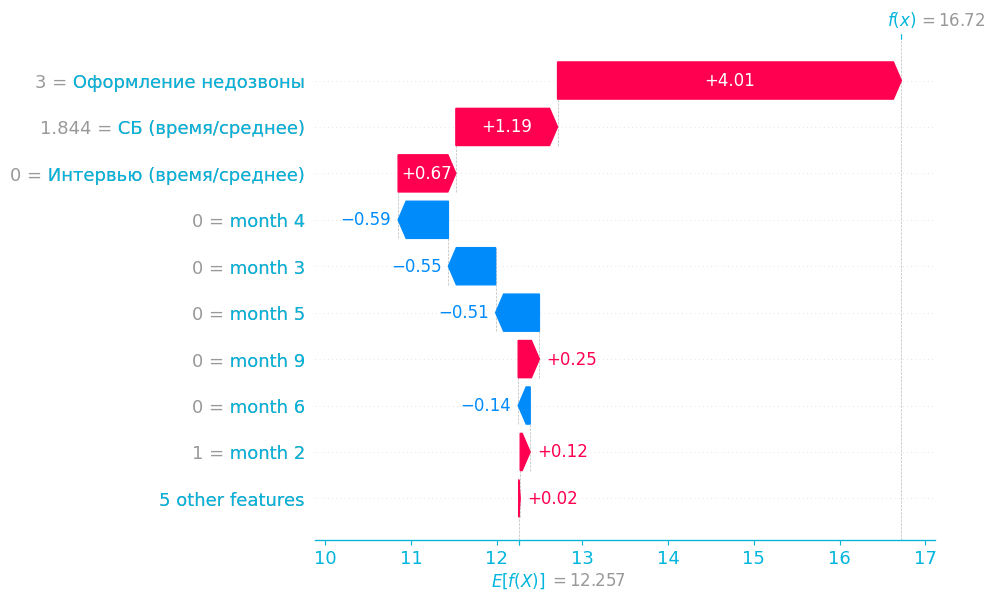

In [269]:
import shap

explainer = shap.Explainer(model_xgb)
shap_values = explainer(df_new)

# visualize the first prediction's explanation

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 15, 'text.color': colors[0],
                     'axes.labelcolor': colors[0], 'xtick.color': colors[0], 'ytick.color': colors[0],
                     'axes.edgecolor': colors[0], 'ytick.color': colors[0]})
shap.plots.waterfall(shap_values[0])

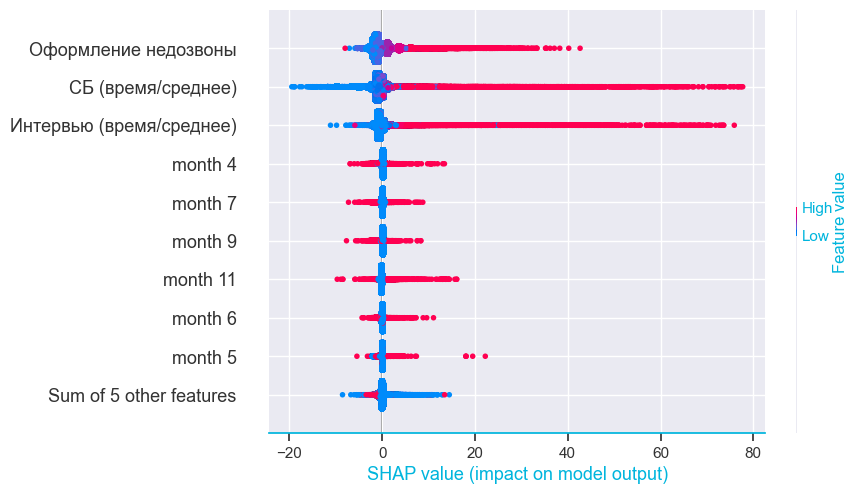

In [239]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 15, 'text.color': colors[0],
                     'axes.labelcolor': colors[0], 'xtick.color': colors[0], 'ytick.color': colors[0],
                     'axes.edgecolor': colors[0], 'ytick.color': colors[0]})

shap.plots.beeswarm(shap_values)

In [253]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(model_xgb, df_new,  df_reg['TTH'],cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: -0.43


In [303]:
yColumn = "TTH"
fitted_model, xColumn, predicted = lm(df_reg,yColumn,['id_partner', 'department_id', 'id_applicant', 'TTH', 'year 2', 'month 12', 'yandex_source'], preprocessing.StandardScaler())
fitted_model.summary2()
# .tables[1]['P>|t|']

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:               OLS              Adj. R-squared:     0.264       
Dependent Variable:  TTH              AIC:                1201090.0636
Date:                2022-06-06 00:22 BIC:                1201140.1099
No. Observations:    164271           Log-Likelihood:     -6.0054e+05 
Df Model:            4                F-statistic:        1.473e+04   
Df Residuals:        164266           Prob (F-statistic): 0.00        
R-squared:           0.264            Scale:              87.683      
----------------------------------------------------------------------
                         Coef.  Std.Err.    t     P>|t|  [0.025 0.975]
----------------------------------------------------------------------
const                    6.8787   0.0591 116.3272 0.0000 6.7628 6.9946
month_start              0.0549   0.0077   7.1032 0.0000 0.0398 0.0701
Оформление недозвоны     2.0830   0.0168 124.1032 0.0000 2.0501 2.1159
СБ (время/среднее)       1.9969   0.0109 182.5972 0.0000 1.9755 2.0183
Интервью (время/среднее) 0.5559   0.0042 133.7029 0.0000 0.5478 0.5641
----------------------------------------------------------------------
Omnibus:            104391.943      Durbin-Watson:         1.913      
Prob(Omnibus):      0.000           Jarque-Bera (JB):      1402877.827
Skew:               2.898           Prob(JB):              0.000      
Kurtosis:           16.091          Condition No.:         19         
======================================================================

"""

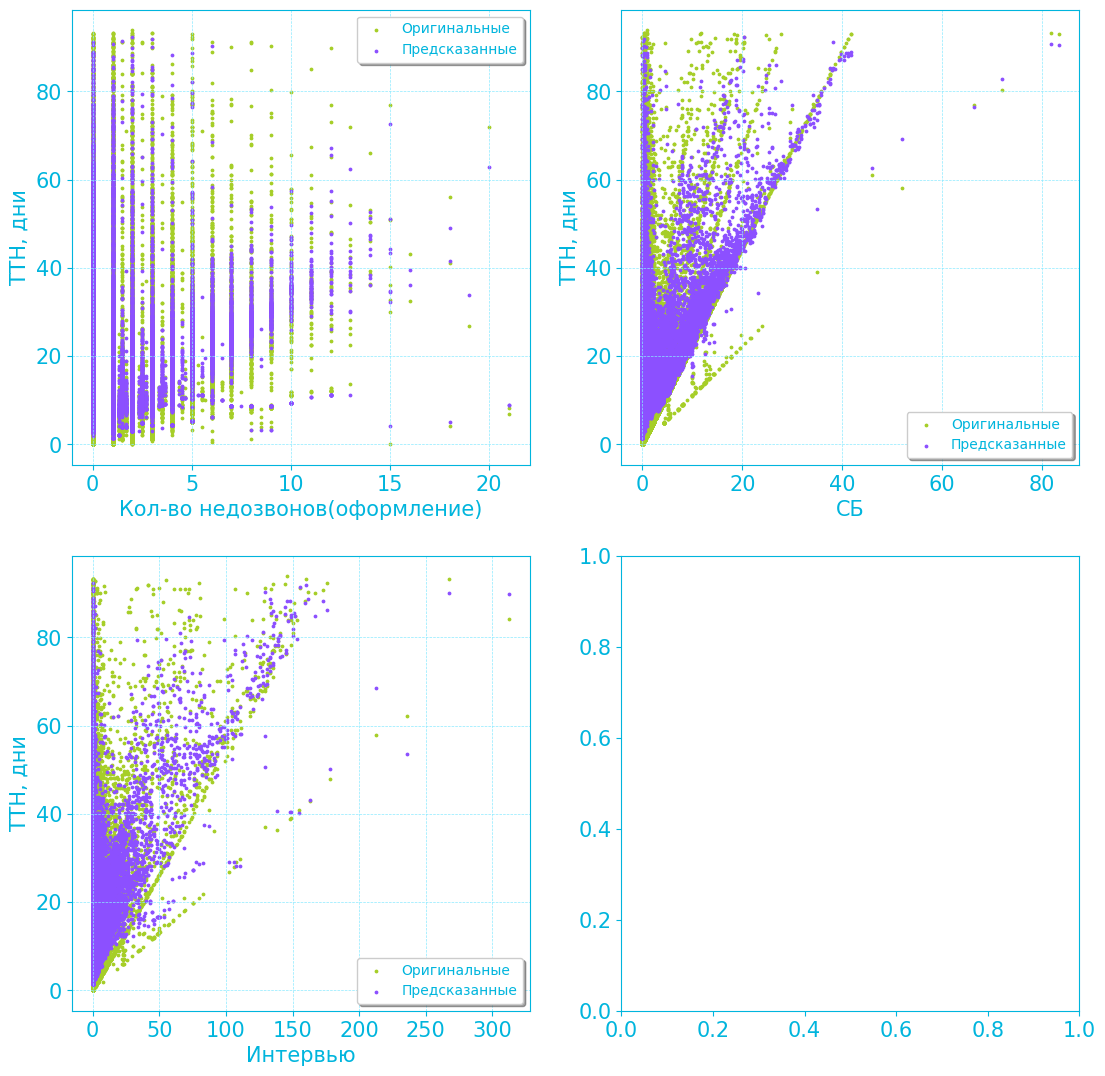

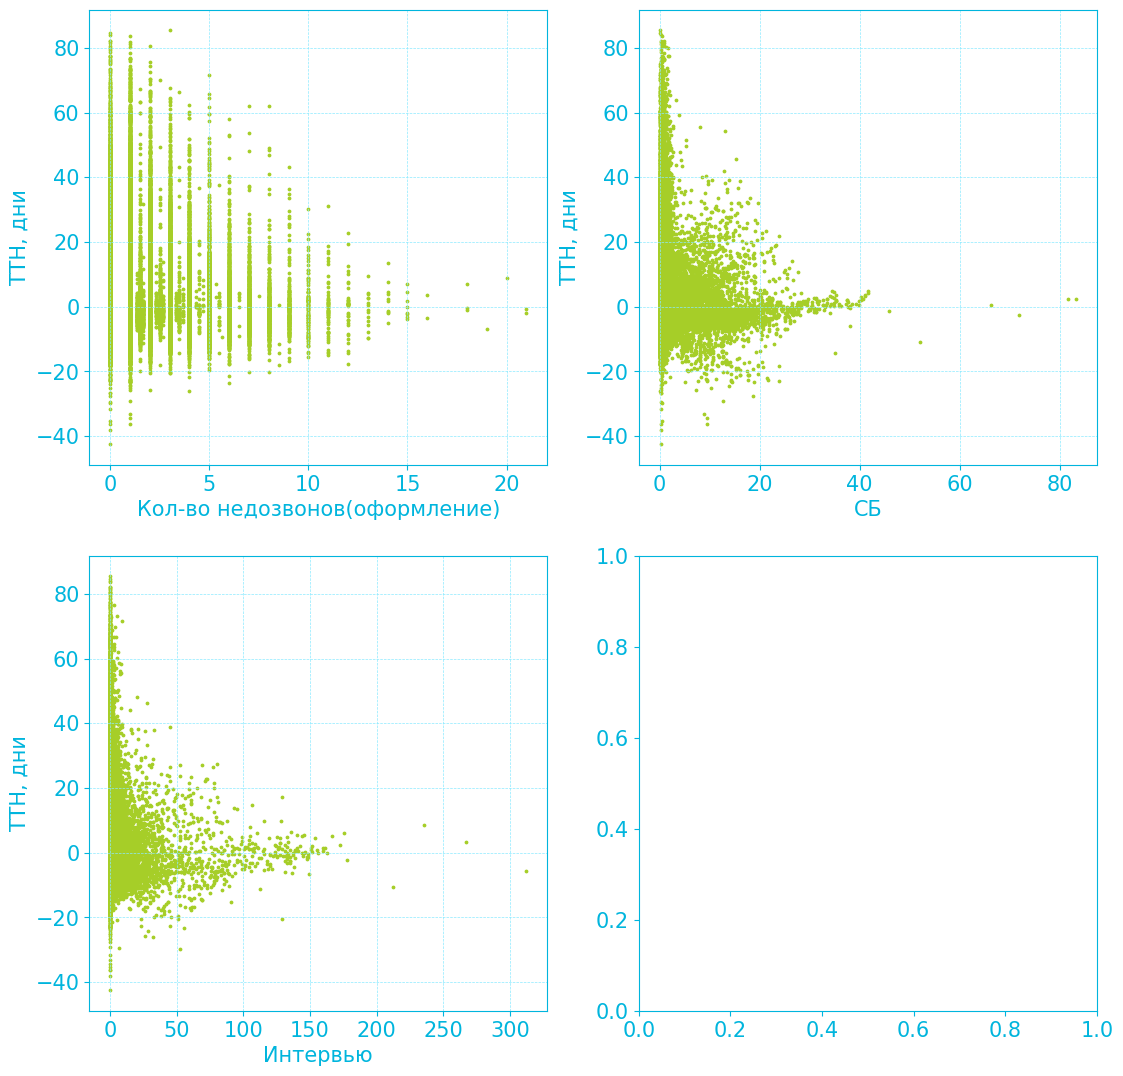

In [301]:
# xy = 3
not_column = []
for column in xColumn:
    if 'month' in column:
        not_column.append(column)
not_column.append('Reserv')
mask = np.isin(xColumn, not_column, invert = True)
viz_column = xColumn[mask]

pred =model_xgb.predict(df_new)
vizScatTTHPred(df_reg, pred, viz_column, yColumn)
vizResTTHPred(df_reg,pred,viz_column,yColumn)

In [299]:
# print(model_xgb.feature_importances_)
# model_xgb.plot.importance(importance_matrix = importanceRaw)
# plot
features = model_xgb.feature_importances_
col = df_new.columns
for i in range(len(features)):
    print(col[i]+ ': ' +str(features[i]))
# plt.bar(range(len(model_xgb.feature_importances_)), model_xgb.feature_importances_)
# plt.show()
# print()


month 1: 0.052370857
month 2: 0.037204616
month 3: 0.05015399
month 4: 0.052657302
month 5: 0.03088371
month 6: 0.030250167
month 7: 0.031423394
month 8: 0.057746388
month 9: 0.03655964
month 10: 0.06528038
month 11: 0.06752851
Оформление недозвоны: 0.23154317
СБ (время/среднее): 0.14656962
Интервью (время/среднее): 0.109828144


In [251]:
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(df_reg['TTH'], pred)
print("xgboost MSE: %.2f" % mse)
print("xgboost RMSE: %.2f" % (mse**(1/2.0)))
mse = mean_squared_error(df_reg['TTH'], predicted)
print("linear reg MSE: %.2f" % mse)
print("linear reg RMSE: %.2f" % (mse**(1/2.0)))
print(model_xgb.get_fscore())

xgboost MSE: 70.43
xgboost RMSE: 8.39
linear reg MSE: 87.30
linear reg RMSE: 9.34


AttributeError: 'XGBRegressor' object has no attribute 'get_fscore'

In [308]:
# Визуализация

# monthes_labels =['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь', 'Декабрь']

# i = 1
# for month_l in monthes_labels:
#     df_reg.loc[df_reg['month_start'] == i, 'month_start'] = monthes_labels[i-1]
#     i+=1
# fig, ax = plt.subplots(1, 1,figsize=(15,10))
# bins = 50
# ax.hist(df_reg['Оформление недозвоны'],bins=bins, color = "#00b5dd")
# SetTTHLabels('Оформление недозвоны')
# plt.show()
df_reg.to_excel('Final_reg_month.xlsx')
# df_reg[viz_column].describe()
# df_reg[viz_column].describe()

# Количество аппликантов в среднем за неделю
stages_place = df_norm.groupby(['stage_name'])['place'].mean().sort_values().reset_index()
stages_name = stages_place['stage_name'].values

# df_temp = df_tth_norm.reset_index(drop=True)
# df_temp = pd.merge(df_temp, df_norm.groupby(['id_applicant'])[stages_name].mean().reset_index(), how = 'left', on="id_applicant")
# df_temp = pd.merge(df_temp, dfMeanTime(df_norm, 'stage_name','СБ', "СБ (время)" ), how = 'left', on="id_applicant")
# df_temp = pd.merge(df_temp, dfMeanTime(df_norm, 'stage_name','Интервью с руководителем', "Интервью с руководителем (время)" ), how = 'left', on="id_applicant")
# df_temp = pd.merge(df_temp, dfMeanTime(df_norm, 'stage_name','Оформление', "Оформление (время)" ), how = 'left', on="id_applicant")
# df_temp

stages_place =pd.merge(stages_place, df_norm.groupby(['stage_name'])['action_time'].describe().reset_index(), how = 'left', on="stage_name") 
stages_place =pd.merge(stages_place, df_norm.groupby(['stage_name'])['action_time'].sum().reset_index(), how = 'left', on="stage_name") 
stages_place = stages_place.rename(columns = {'action_time':'sum'})
stages_place['% от общей'] = stages_place['sum'] / stages_place['sum'].sum()
# stages_place.to_excel('stage_percent.xlsx')
stages_place

# df_reg.sum()
oform_time = dfMeanTime(df_norm, 'stage_name','Оформление', "Оформление (время)" )

# pd.merge(df_tth_norm[['id_applicant', 'TTH']], oform_time, how = 'right', on="id_applicant").to_excel('oform_time.xlsx')
df_reg

,id_applicant,id_partner,department_id,TTH,month_start,Оформление недозвоны,СБ (время/среднее),Интервью (время/среднее)
0,2196746,2393754,6715,27.685659,Февраль,3.0,1.843986,0.000023
1,2196747,2314693,12252,6.133310,Январь,0.0,2.287242,0.000026
2,2196748,2346300,5760,28.251127,Февраль,0.0,2.297314,0.000026
3,2196752,2393757,32391,17.202996,Январь,4.0,2.331441,0.000022
4,2196753,2393758,32156,10.153854,Январь,1.0,1.837830,0.000025
...,...,...,...,...,...,...,...,...
164266,4874547,3857100,35046,2.984132,Апрель,0.0,0.000011,0.000053
164267,4874561,3843493,24135,2.981270,Апрель,0.0,0.000010,0.000043
164268,4874899,3847746,45624,2.944752,Апрель,0.0,0.869699,0.059207
164269,4875075,3873082,9996,2.186676,Апрель,1.0,0.000050,0.000046


In [62]:
df_reg['Оформление недозвоны'].describe()

count    164271.000000
mean          1.206027
std           1.395442
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          21.000000
Name: Оформление недозвоны, dtype: float64

In [63]:
df_reg[viz_column].describe()

,Оформление недозвоны,СБ (время/среднее),Интервью (время/среднее)
count,164271.000000,164271.000000,164271.000000
mean,1.206027,0.986157,0.985737
std,1.395442,2.140003,5.561433
min,0.000000,0.000000,0.000000
25%,0.000000,0.267726,0.000033
50%,1.000000,0.472094,0.000041
75%,2.000000,0.890697,0.000055
max,21.000000,83.258690,312.455644


In [64]:
df_reg['TTH'].describe()

count    164271.000000
mean         12.257895
std          10.914830
min           0.100472
25%           5.894358
50%           8.708971
75%          14.988154
max          93.814532
Name: TTH, dtype: float64

In [65]:
temp_df = df_norm.groupby(['id_applicant', 'activity_name', 'stage_name'])['action_date'].count().reset_index()
temp_df = temp_df.rename(columns={"action_date": "amount"})
temp_df = temp_df[temp_df['amount']>1]
temp_df.groupby('stage_name').sum()
# temp_df[temp_df['stage_name'] == 'Обработка'].groupby('activity_name').count()

,id_applicant,amount
stage_name,,
Интервью с руководителем,242527191878,159714
Назначение времени на оформление/медосмотр,104723453877,83577
Обработка,75731286560,43097
Ожидание,1006169246,626
Оформление,384907658935,320975
СБ,277361595902,161645


In [66]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_reg[xColumn], df_reg[yColumn], test_size=0.2)

classifiers = [
    linear_model.BayesianRidge(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
#     linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

for classifier in classifiers:
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    print(metrics.r2_score(Y_test, Y_pred))

0.26162294075956916
0.2615977094344465
-0.051129908901858645
0.26160515202317036


In [67]:
df_reg[viz_column].columns

Index(['Оформление недозвоны', 'СБ (время/среднее)',
       'Интервью (время/среднее)'],
      dtype='object')

In [68]:
classifier = linear_model.ARDRegression()
reg_results = classifier.fit(X_train, Y_train)
reg_coef = pd.DataFrame(data=classifier.coef_, index = xColumn)
reg_coef.sort_values(by=[0], ascending=[False], inplace = True)
print(reg_coef)

                                 0
Оформление недозвоны      2.158656
СБ (время/среднее)        2.004413
Интервью (время/среднее)  0.558118
month 11                 -0.147422
month 1                  -0.806799
month 2                  -0.926786
month 10                 -1.174417
month 5                  -1.551507
month 3                  -1.641220
month 6                  -1.717027
month 8                  -1.718233
month 9                  -2.004061
month 7                  -2.185885
month 4                  -2.501897


In [69]:
# x_ax = range(len(Y_test))
# X_test_c = sm.add_constant(X_test)
# Y_pred = fitted_model.predict(X_test_c)
# plt.subplots(figsize=(13,13))
# plt.scatter(x_ax, Y_test, linewidth=1, label="original",s=5)
# plt.scatter(x_ax, Y_pred, linewidth=1.1, label="predicted",s=5)
# plt.title("y-test and y-predicted data")
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.legend(loc='best',fancybox=True, shadow=True)
# plt.grid(True)
# plt.show() 

In [175]:
my_cmap2 = plt.colors.LinearSegmentedColormap('my_colormap2',
                                              {
  '0.0': colors[1],
  '1': grid_color
},256)
my_cmap2.imshow(a,aspect='auto', cmap =my_cmap2)    

AttributeError: module 'matplotlib.pyplot' has no attribute 'colors'

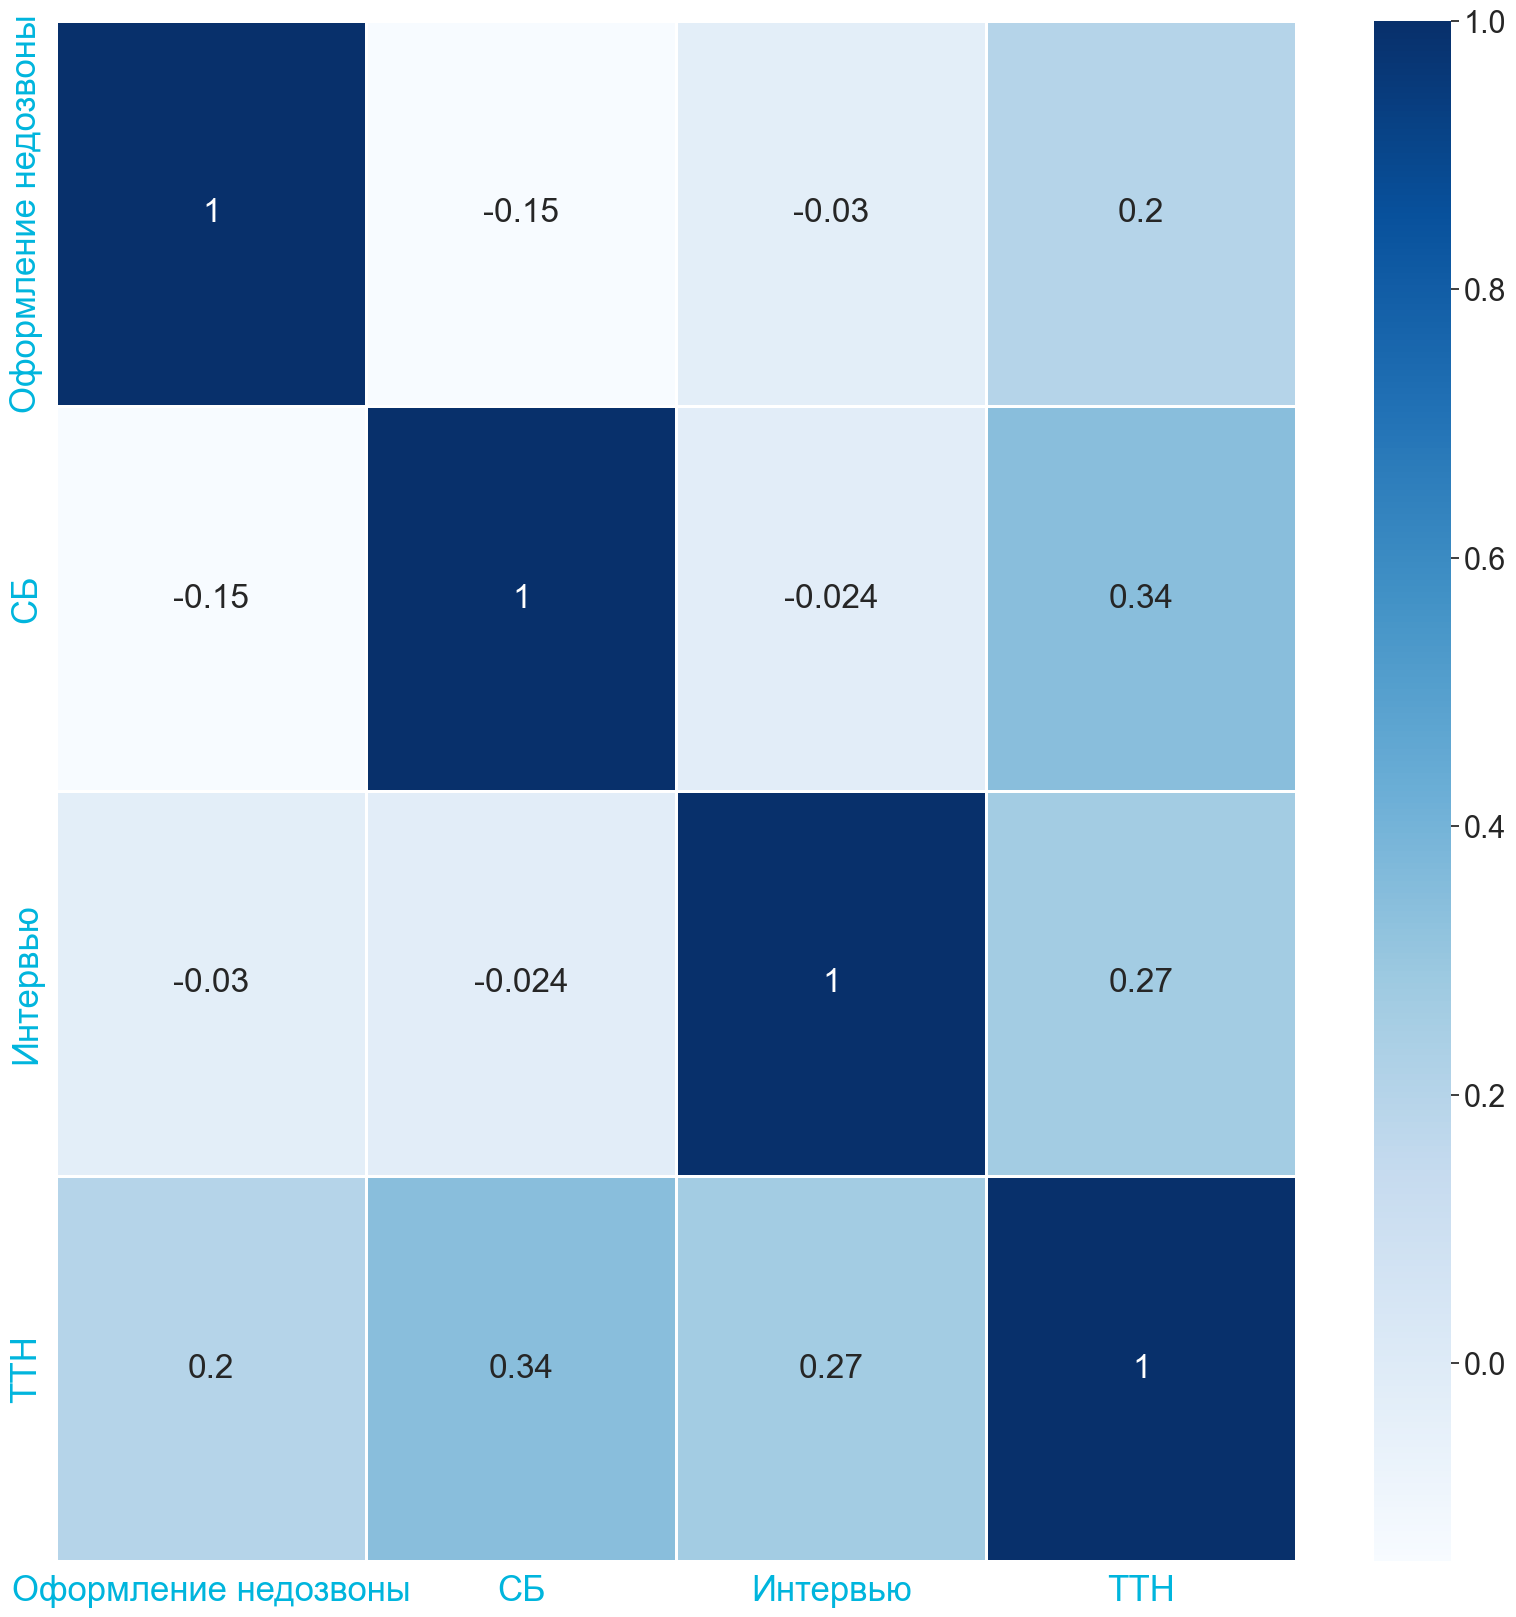

In [210]:
import seaborn as sns
plt.subplots(figsize=(20,20))
monthes_labels =['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь', 'TTH']#,'Декабрь'
metrics_labels = ['Оформление недозвоны', 'СБ', 'Интервью', 'TTH']
# [np.append(viz_column,yColumn)]
# [np.append(monthes,yColumn)]
labels = metrics_labels
sns.set(font_scale=2.0)
g = sns.heatmap(df_reg[np.append(viz_column,yColumn)].corr(),annot=True,linewidths = 1, cmap="Blues")
g.set_yticklabels(labels,
              fontsize = 25)
g.set_xticklabels(labels, rotation = 0,
              fontsize = 25)
plt.rcParams.update({'font.size': 15, 'text.color': colors[0],
                     'axes.labelcolor': colors[0], 'xtick.color': colors[0], 'ytick.color': colors[0],
                     'axes.edgecolor': colors[0], 'ytick.color': colors[0]})
plt.savefig('fuck_corr.png')

In [46]:
df_tth

,id_applicant,id_partner,department_id,TTH
0,2196746,2393754,6715,27.685659
1,2196747,2314693,12252,6.133310
2,2196748,2346300,5760,28.251127
3,2196752,2393757,32391,17.202996
4,2196753,2393758,32156,10.153854
...,...,...,...,...
193762,4886560,1197774,35106,0.000151
193763,4886575,1542748,28162,0.000176
193764,4886579,3878216,10530,0.000182
193765,4886599,3884467,48259,0.000218


In [47]:
stages_g =  df_norm.dropna(subset=['action_time']).groupby(['stage_name'])['action_time'].describe() # ['stage_name', 'activity_name']
stages_g['sum'] = stages_g['mean'] * stages_g['count']
stages_g

,count,mean,std,min,25%,50%,75%,max,sum
stage_name,,,,,,,,,
Выход на работу,156.0,1.078194,2.533568,0.000000,0.000000,0.004620,1.185274,21.760230,168.198321
Гайд-интервью,4.0,0.000011,0.000002,0.000009,0.000010,0.000011,0.000012,0.000013,0.000044
Групповое собеседование и тестирование,6.0,0.000010,0.000002,0.000007,0.000009,0.000010,0.000012,0.000013,0.000062
Интервью с руководителем,470750.0,0.554103,9.122335,0.000000,0.000008,0.000011,0.000015,618.209540,260843.799030
Кадровый резерв,4.0,0.000013,0.000011,0.000007,0.000008,0.000009,0.000014,0.000030,0.000054
Мы отказали,22.0,0.308741,1.448064,0.000006,0.000008,0.000012,0.000015,6.792035,6.792300
Назначение времени на оформление/медосмотр,205262.0,2.538058,6.628507,0.000000,0.000106,0.803150,2.998456,430.056809,520966.805882
Не прошел СБ,382.0,0.022709,0.211153,0.000000,0.000009,0.000011,0.000014,3.742623,8.674995
Обработка,348531.0,0.163508,6.332038,0.000000,0.000009,0.000011,0.000014,565.056308,56987.699728


In [54]:
date = df_norm['action_date'].min().tzinfo.localize(pd.to_datetime(20200101, format='%Y%m%d'))
df_norm[df_norm['action_date']>date].groupby('stage_name')['action_time'].sum()

stage_name
Выход на работу                                   0.004620
Интервью с руководителем                       1100.755071
Назначение времени на оформление/медосмотр        0.000000
Не прошел СБ                                      0.000349
Обработка                                        13.074398
Отказался                                         0.000117
Оформление                                    19826.728125
СБ                                             4379.108289
Создание кандидата                                0.000000
Name: action_time, dtype: float64

In [55]:
# df_norm[df_norm['id_applicant']==4146514]

In [56]:
# df_norm[df_norm['activity_name']=='Узнать результаты медосмотра']

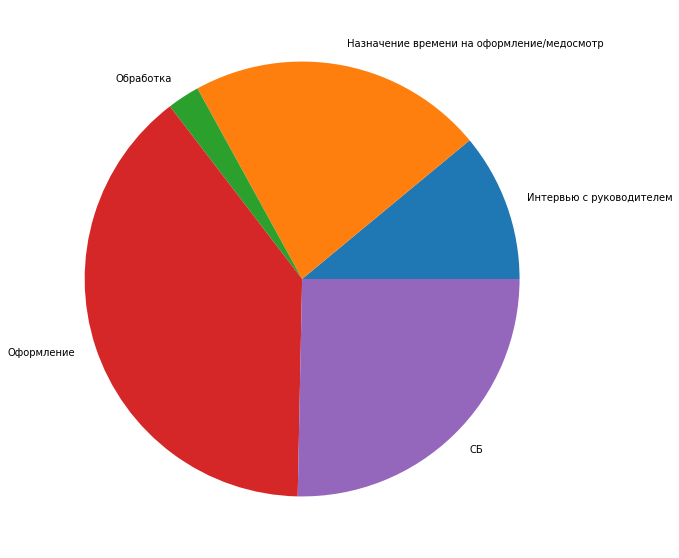

In [57]:
stage_pie_mask = stages_g['sum'] > 2200
stage_sum =stages_g[stage_pie_mask]['sum'].sum()
stage_sum

y = stages_g[stage_pie_mask]['sum'] / stage_sum
mylabels = stages_g[stage_pie_mask].index

plt.subplots(1, 1,figsize=(15,10))
plt.pie(y, labels = mylabels)
plt.show() 

In [58]:
# df_stage_activ = df_fits.dropna(subset=['action_time']).groupby(['stage_name', 'activity_name']).describe().reset_index
# df_stage_activ[]

In [59]:
# df_stage_result = df_fits.dropna(subset=['action_time']).groupby(['stage_name', 'result_name']).count().reset_index()
# df_stage_result[df_stage_result['stage_name']=='Оформление']

In [60]:

reserved_applicants = df.loc[df['result_name']=="Кадровый резерв", 'id_applicant'].unique()
reserved_applicants= np.append(reserved_applicants, df.loc[df['stage_name']=="Кадровый резерв", 'id_applicant'].unique())
reserved_applicants = np.append(reserved_applicants, df.loc[df['stage_name']=="Резерв", 'id_applicant'].unique())
reserved_applicants = np.unique(reserved_applicants)

In [61]:
sb_c = 1
int_c = 1
df_sb_int = df_fits[(df_fits['id_applicant'].isin(reserved_applicants))& ((df_fits['stage_name']=='СБ') | (df_fits['stage_name']=='Интервью с руководителем'))]
df_sb_int = df_sb_int.groupby(['id_applicant', 'stage_name'])['action_time'].sum().reset_index()
df_sb_int = pd.merge(df_sb_int[df_sb_int['stage_name'] == 'Интервью с руководителем'], df_sb_int[df_sb_int['stage_name'] == 'СБ'], how = 'outer', on="id_applicant")
df_sb_int['action_time_x(short)'] = df_sb_int['action_time_x']
df_sb_int.loc[(df_sb_int['action_time_x(short)']>sb_c), 'action_time_x(short)'] = sb_c
df_sb_int['action_time_y(short)'] = df_sb_int['action_time_y']
df_sb_int.loc[df_sb_int['action_time_y(short)']>int_c, 'action_time_y(short)'] = int_c
df_sb_int.rename(columns = {'action_time_x':'interview_time', 'action_time_x(short)':'interview_time(short)','action_time_y':'sb_time', 'action_time_y(short)':'sb_time(short)'}, inplace = True)
df_sb_int = df_sb_int.drop(['stage_name_x','stage_name_y'] , axis=1)
# df_sb_int.to_excel('reserved.xlsx')

In [62]:
# nedozvon = df_fits[['id_applicant','action_date', 'action_time']][(df_fits['result_name'] == 'Недозвон')]
# nedozvon['action_date'] = nedozvon['action_date'].dt.tz_localize(None)
# nedozvon.to_excel('Nedozvon.xlsx')
sum_time_med_c = 3
sum_time_medN_c = 3
sum_time_res_c = 3
df_med = df_fits[(df_fits['activity_name'] == 'Назначить время на оформление/медосмотр')].groupby(['activity_name', 'id_applicant']).agg({'action_time': ['sum','count']}).reset_index()
df_med.columns = df_med.columns.droplevel(1)
df_med = df_med.drop('activity_name', axis=1)
df_med.columns.values[1] = "sum_time_med"
df_med.columns.values[2] = "count_time_med"
print(len(df_med))
df_med2 = df_fits[(df_fits['activity_name'] == 'Назначить время на оформление/медосмотр (недозвон)')].groupby(['activity_name', 'id_applicant']).agg({'action_time': ['sum','count']}).reset_index()
df_med2.columns = df_med2.columns.droplevel(1)
df_med2 = df_med2.drop('activity_name', axis=1)
df_med2.columns.values[1] = "sum_time_medN"
df_med2.columns.values[2] = "count_time_medN"
print(len(df_med2))
df_med =  pd.merge(df_med, df_med2, how = 'outer', on="id_applicant")
df_med2 = df_fits.dropna(subset=['action_time'])[(df_fits['activity_name'] == 'Узнать результаты приема')].groupby(['activity_name', 'id_applicant']).agg({'action_time': ['sum','count']}).reset_index()
df_med2.columns = df_med2.columns.droplevel(1)
df_med2 = df_med2.drop('activity_name', axis=1)
df_med2.columns.values[1] = "sum_time_res"
df_med2.columns.values[2] = "count_time_res"
print(len(df_med2))
df_med =  pd.merge(df_med, df_med2, how = 'outer', on="id_applicant")
df_med['sum_time_med(short)'] = df_med['sum_time_med']
df_med.loc[(df_med['sum_time_med(short)']>sum_time_med_c), 'sum_time_med(short)'] = sum_time_med_c
df_med['sum_time_medN(short)'] = df_med['sum_time_medN']
df_med.loc[df_med['sum_time_medN(short)']>sum_time_medN_c, 'sum_time_medN(short)'] = sum_time_medN_c
df_med['sum_time_res(short)'] = df_med['sum_time_res']
df_med.loc[df_med['sum_time_res(short)']>sum_time_res_c, 'sum_time_res(short)'] = sum_time_res_c
# df_med.to_excel('med_time.xlsx')

185069
80014


C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


80988


In [63]:
results_g =  df_fits.dropna(subset=['action_time']).groupby(['result_name'])['action_time'].describe()
# results_g
results_g

,count,mean,std,min,25%,50%,75%,max
result_name,,,,,,,,
В белый список,4.0,0.000259,0.000101,0.000114,0.000234,0.000286,0.000310,0.000349
В ожидании,153482.0,3.158289,5.908128,0.000000,1.016673,1.918097,3.894268,520.710384
Время назначено,191517.0,1.840695,4.353546,0.000000,0.000073,0.000276,2.811733,291.880512
Встреча назначена,224659.0,0.594591,8.826268,0.000000,0.000009,0.000011,0.000015,600.796568
Интервью с руководителем,482.0,0.507145,5.623006,0.000016,0.000107,0.000176,0.000488,113.246137
Источник Яндекс Цифра,27.0,0.496732,1.423606,0.000011,0.000198,0.034347,0.086146,7.030999
Источник не Яндекс Цифра,45338.0,0.144579,5.950515,0.000000,0.000011,0.000013,0.000017,469.080663
Кадровый резерв,197.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Назначить время на оформление/медосмотр,3179.0,0.302307,2.244807,0.000000,0.000129,0.000187,0.000383,38.193814


In [64]:
activities_g =  df_fits.dropna(subset=['action_time']).groupby(['activity_name'])['action_time'].describe()
activities_g

,count,mean,std,min,25%,50%,75%,max
activity_name,,,,,,,,
Вернуть в воронку,8777.0,0.242731,2.267561e+00,0.000000,0.000062,0.000159,0.000346,113.246137
Вывести из черного списка,5.0,0.000208,1.429926e-04,0.000006,0.000114,0.000274,0.000297,0.000349
Назначить время для гайд-интервью,2.0,0.000012,7.476836e-07,0.000012,0.000012,0.000012,0.000012,0.000013
Назначить время на оформление,8211.0,1.034397,1.984597e+00,0.000000,0.000065,0.000233,1.043698,18.966384
Назначить время на оформление/медосмотр,218463.0,2.228467,5.390705e+00,0.000000,0.000131,0.221104,2.827222,430.056809
Назначить время на оформление/медосмотр (недозвон),124348.0,2.915728,7.302221e+00,0.000000,0.000071,0.809676,3.174616,392.058357
Назначить групповое собеседование и тестирование,2.0,0.000008,1.037589e-06,0.000007,0.000008,0.000008,0.000008,0.000009
Назначить интервью с руководителем,225710.0,0.617507,8.965768e+00,0.000000,0.000009,0.000011,0.000015,600.796568
Подготовить анкету кандидата,220390.0,1.376653,1.224314e+01,0.000000,0.000013,0.175961,0.832853,527.944208


In [65]:
df_new_tth = df_tth.reset_index(drop = True)
# df_med
df_new_tth = pd.merge(df_new_tth, df_med, how = 'left', on="id_applicant")
df_new_tth.fillna(0, inplace = True)
df_new_tth['TTH'] = df_new_tth['TTH'] - (df_new_tth['sum_time_med'] - df_new_tth['sum_time_med(short)'] + df_new_tth['sum_time_medN'] - df_new_tth['sum_time_medN(short)'] + df_new_tth['sum_time_res'] - df_new_tth['sum_time_res(short)'])
df_new_tth = df_new_tth[['id_applicant','TTH']] 

# df_sb_int
df_new_tth = pd.merge(df_new_tth, df_sb_int, how = 'left', on="id_applicant")
df_new_tth.fillna(0, inplace = True)
df_new_tth['TTH'] = df_new_tth['TTH'] - (df_new_tth['sb_time'] - df_new_tth['sb_time(short)'] + df_new_tth['interview_time'] - df_new_tth['interview_time(short)'])
df_new_tth = df_new_tth[['id_applicant','TTH']] 


# df_new_tth.to_excel('TTH_NEW.xlsx')
df_tth_new_dep =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant', 'department_id'])['action_time'].count().reset_index()
df_tth_new_dep = df_tth_new_dep.join(df_new_tth.set_index('id_applicant'), on='id_applicant')
df_tth_new_dep = df_tth_new_dep.groupby(['department_id'])['TTH'].median().reset_index()
df_tth_new_dep.to_excel('TTH_DEP_NEW.xlsx')
df_tth_new_dep.describe()


,department_id,TTH
count,15550.000000,15550.000000
mean,22926.999293,5.504920
std,13317.867234,5.549973
min,5637.000000,0.000000
25%,9945.250000,4.521942
50%,24309.000000,5.315661
75%,32716.750000,6.270318
max,49859.000000,431.057327


In [77]:
quantile_dep = df_tth_dep['TTH_median'].quantile(.999)
quantile_dep

19.0

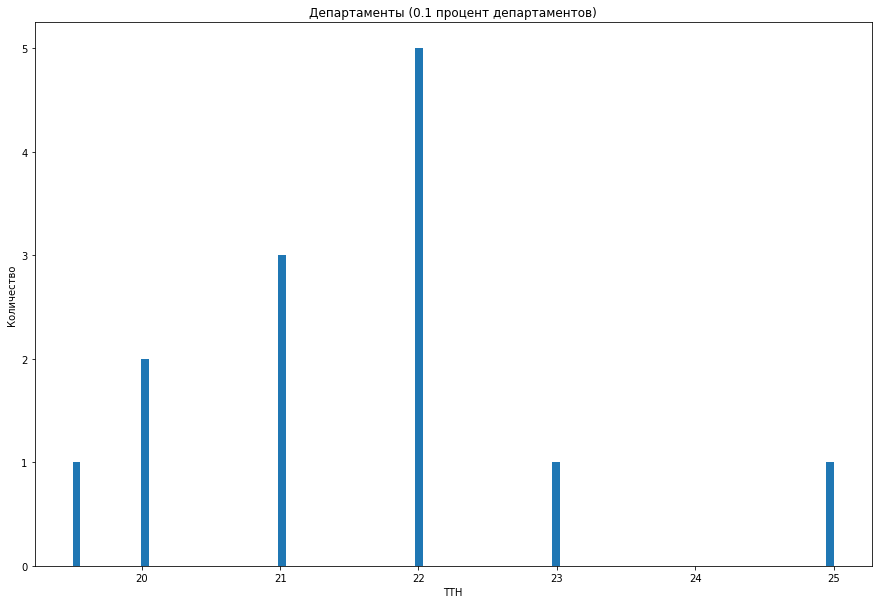

In [76]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
bins = 100
ax.hist(df_tth_dep['TTH_median'][(df_tth_dep['TTH_median']>quantile_dep)],bins=bins)
SetTTHLabels('Департаменты (0.1 процент департаментов)')
plt.show()

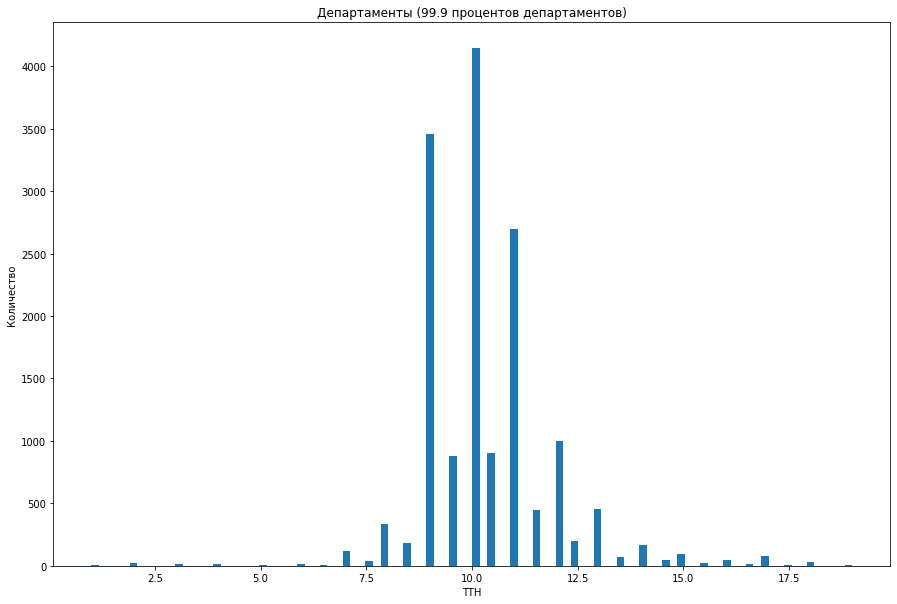

In [78]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
bins = 100
ax.hist(df_tth_dep['TTH_median'][(df_tth_dep['TTH_median']<=quantile_dep)],bins=bins)
SetTTHLabels('Департаменты (99.9 процентов департаментов)')
plt.show()

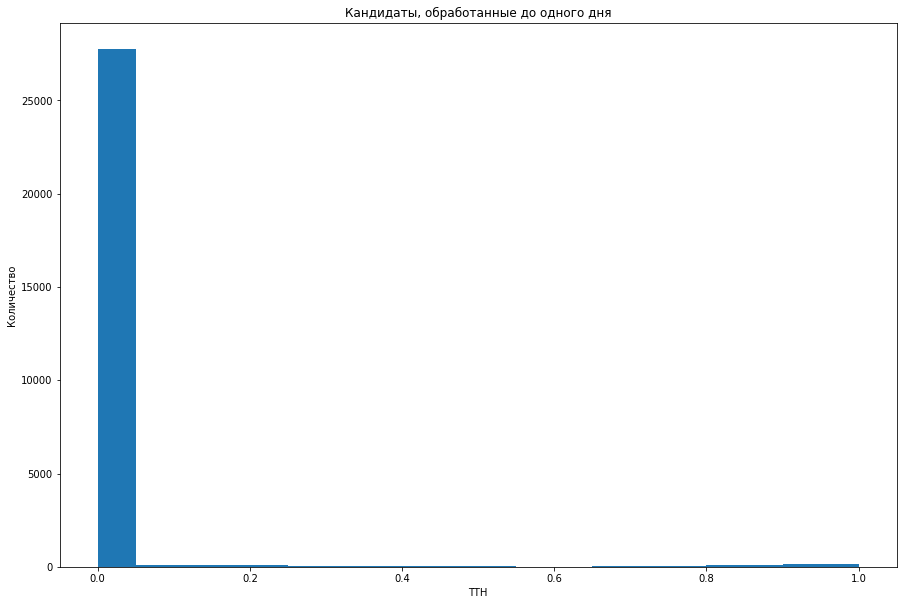

In [79]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
bins = 20
ax.hist(df_tth['TTH'][(df_tth['TTH']<=1)],bins=bins)
SetTTHLabels('Кандидаты, обработанные до одного дня')
plt.show()

In [ ]:
# df_fits[df_fits['id_applicant'] == 2205452]

In [84]:
# df_tth[(df_tth['TTH']<0.0001)]
quantile_tth = df_tth['TTH'].quantile(.99)
quantile_tth

82.14418599830046

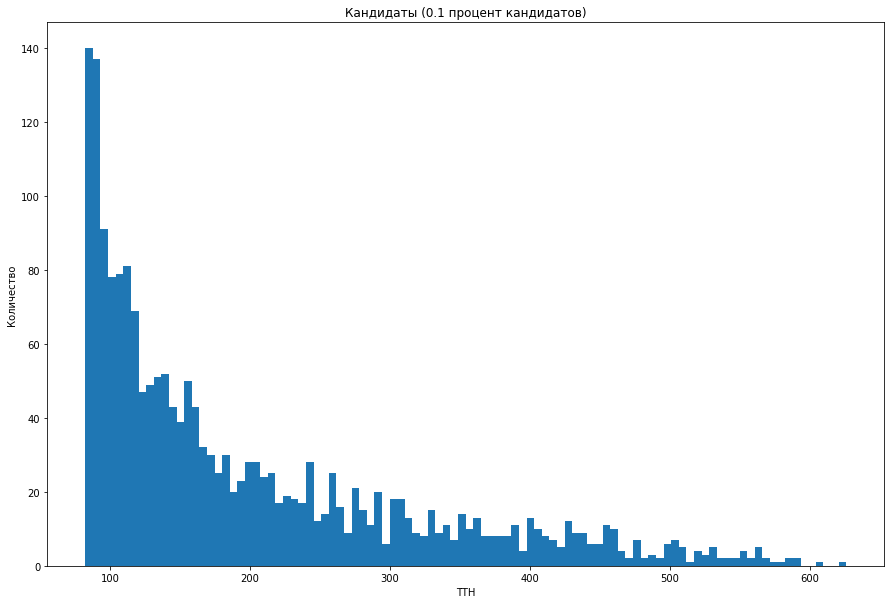

In [85]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
ax.hist(df_tth['TTH'][(df_tth['TTH']<5000)&(df_tth['TTH']>quantile_tth)],bins=100)
SetTTHLabels('Кандидаты (0.1 процент кандидатов)')
plt.show()

In [86]:
# df_fits

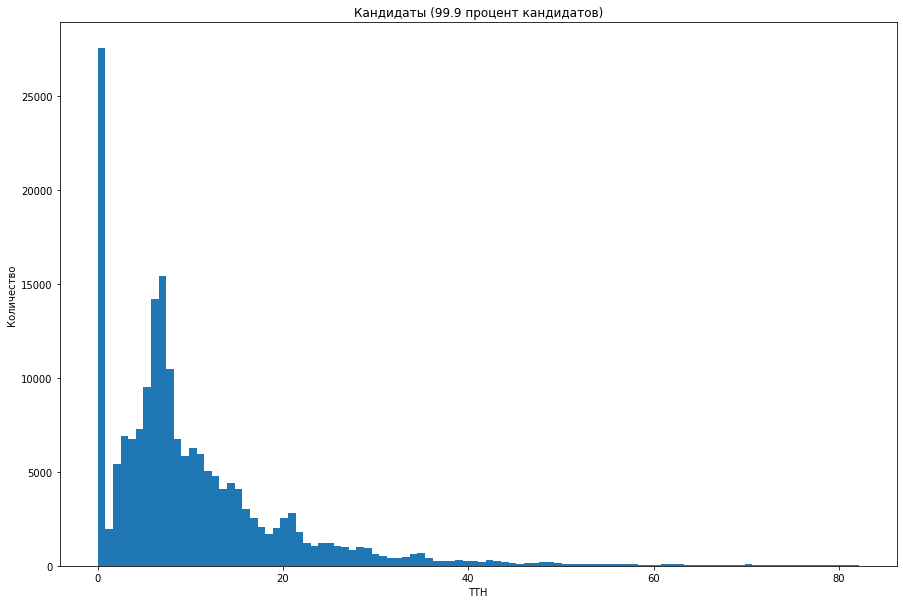

In [87]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
ax.hist(df_tth['TTH'][(df_tth['TTH']<quantile_tth)& (df_tth['TTH']>0)], bins = 100)
SetTTHLabels('Кандидаты (99.9 процент кандидатов)')
plt.show()

In [88]:
df_fits['action_time'].quantile(.999)

68.2677492796434

In [89]:
df_tth['TTH'][df_tth['TTH']>100]

78        473.820724
129       134.243540
174       533.154021
187       370.023845
312       173.923378
             ...    
149411    100.938892
150358    105.030456
151363    106.354237
151727    106.162903
153141    112.194402
Name: TTH, Length: 1551, dtype: float64

In [90]:
# stage_name = 'Интервью с руководителем'
# stage_series = df_fits['action_time'][df_fits['stage_name'] == stage_name]
# time_threshold = stages_g.loc[stage_name]['75%']

# df.iloc[stage_series[stage_series.values > time_threshold].index]

In [91]:
# amount_applicant =  df_fits.groupby(['id_partner','id_applicant']).size().reset_index()
# amount_applicant =  amount_applicant.groupby(['id_partner'])['id_applicant'].count().reset_index()
# amount_applicant[amount_applicant['id_applicant']>3]

In [92]:
# df.iloc[df[df['stage_name'] == 'Групповое собеседование и тестирование'].index+1]
# print(len(stages[stages['count'] > stage_threshold]))
# df.iloc[df[df['action_time'] < 0].index + 1]
# df[df['activity_name'] == 'Провести первичную обработку']

In [99]:
df_min_date =df_fits.groupby(['id_applicant'])['action_date'].min().reset_index()
df_cohort = pd.merge(df_tth, df_min_date, how = 'left', on="id_applicant")
df_cohort.rename(columns = {'action_date':'creation_date'}, inplace = True)
fits_min =  df_fits[df_fits['result_name'] == 'Принят'].groupby(['id_applicant'])['action_date'].max().reset_index()
df_cohort = pd.merge(df_cohort, fits_min, how = 'left', on="id_applicant")
df_cohort.rename(columns = {'action_date':'applied_date'}, inplace = True)
# df_cohort['applied_date'] = df_cohort['applied_date'].dt.tz_localize(None)
# df_cohort['creation_date'] = df_cohort['creation_date'].dt.tz_localize(None)
date2018 = df_cohort['applied_date'].min().tzinfo.localize(pd.to_datetime(20180101, format='%Y%m%d'))
df_cohort['applied_date_days'] = (df_cohort['applied_date'] - date2018).dt.days % 365
df_cohort['creation_date_days'] = (df_cohort['creation_date'] - date2018).dt.days % 365

# df_cohort.to_excel('cohort_new.xlsx')

In [100]:
df_cohort

,id_applicant,id_partner,department_id,TTH,creation_date,applied_date,applied_date_days,creation_date_days
0,2196746,2393754,6715,27.685659,2018-01-05 06:37:15.434165+00:00,2018-02-01 23:04:53.450437+00:00,31,4
1,2196747,2314693,12252,6.133310,2018-01-05 06:37:54.019063+00:00,2018-01-11 09:51:21.213384+00:00,10,4
2,2196748,2346300,5760,28.251127,2018-01-05 06:39:55.362530+00:00,2018-02-02 12:41:49.992103+00:00,32,4
3,2196752,2393757,32391,17.202996,2018-01-05 06:50:30.704473+00:00,2018-01-22 11:43:14.342473+00:00,21,4
4,2196753,2393758,32156,10.153854,2018-01-05 06:50:31.727665+00:00,2018-01-15 10:32:20.674998+00:00,14,4
...,...,...,...,...,...,...,...,...
193762,4886560,1197774,35106,0.000151,2020-04-14 11:04:14.792897+00:00,2020-04-14 11:04:44.553692+00:00,104,104
193763,4886575,1542748,28162,0.000176,2020-04-14 11:06:05.368398+00:00,2020-04-14 11:06:42.313671+00:00,104,104
193764,4886579,3878216,10530,0.000182,2020-04-14 11:06:30.676429+00:00,2020-04-14 11:07:06.756809+00:00,104,104
193765,4886599,3884467,48259,0.000218,2020-04-14 11:07:46.024476+00:00,2020-04-14 11:08:17.306195+00:00,104,104


In [103]:
date2018 = df_cohort['applied_date'].min().tzinfo.localize(pd.to_datetime(20180101, format='%Y%m%d'))
df_cohort['weeks'] = (df_cohort['applied_date'] - date2018).dt.days
df_cohort['weeks'] = (df_cohort['weeks'] % 365 / 7).astype(int)
df_cohort['TTH_int'] = (df_cohort['TTH']/7).astype(int)
# df_cohort[(df_cohort['TTH_int']>0)&(df_cohort['TTH_int']<10)]
# retention_pivot = pd.DataFrame(df_cohort.pivot_table(index='weeks',
#                                         columns='TTH_int',
#                                         values='TTH',
#                                         aggfunc='count'))
# [(df_cohort['TTH_int']>0)&(df_cohort['TTH_int']<10)]
# retention_pivot
# retention_pivot[1].plot()
# retention_pivot[1].index + 1



In [104]:
# retention_pivot = pd.DataFrame(df_cohort.pivot_table(index='weeks',
#                                         columns='TTH_int',
#                                         values='TTH',
#                                         aggfunc='count'))
# [(df_cohort['TTH_int']>0)&(df_cohort['TTH_int']<10)]
# retention_pivot.to_excel('cohort.xlsx')
# retention_pivot[1].plot()
# retention_pivot[1].index + 1

In [105]:
# retention_pivot[1]

In [109]:
# df_cohort['TTH_int'].max()
# pd.DataFrame(20180101)

# date = pd.to_datetime(20180101, format='%Y%m%d')
# date = df_cohort['applied_date'].min().tzinfo.localize(pd.to_datetime(20180101, format='%Y%m%d'))
# date
# df_cohort['action_date'].min().tzinfo

In [110]:
import matplotlib.pyplot as plt

def showHist(data, grouped_data, column_name = 'stage_name', col_threshold = 0, is_special = True, xy = 4):
    
    fig, axs = plt.subplots(xy, xy, figsize=(20,15))
    i = 0
    not_special_const = 5
    
    for col in data[column_name].unique():
        series = data['action_time'][data[column_name] == col]
        time_threshold = not_special_const
        if is_special and col in grouped_data.index:
            time_threshold = grouped_data.loc[col]['75%']
        col_len = len(series)
    
        if col_len > col_threshold:
            x, y =divmod(i, xy)
            i+=1
#             axs[x,y].set_ylabel('Кол-во')
            axs[x,y].set_xlabel(f'{col}, {col_len}')
            series[series.values < time_threshold].hist(ax=axs[x,y],bins=100)
        print('.', end = '')
    plt.show()

def checkShowHist(data, grouped_data, column_name = 'stage_name', col_threshold = 0, is_special = True, xy = 4):
    
    not_special_const = 5
    if is_special and len(data[column_name].unique()) != len(grouped_data):
        print('Not all columns in grouped_data')
    
    i = 0
    for col in data[column_name].unique():
        series = data['action_time'][data[column_name] == col]
        col_len = len(series)
    
        if col_len > col_threshold:
            x, y =divmod(i, xy)
            if x > xy or y > xy:
                print(f'Too many columns in data for diagramm {xy}*{xy}')                
            i+=1

.............

Exception ignored in: <function ZipFile.__del__ at 0x000001A7A384B1F8>
Traceback (most recent call last):
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\zipfile.py", line 1809, in __del__
    self.close()
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\zipfile.py", line 1826, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


...

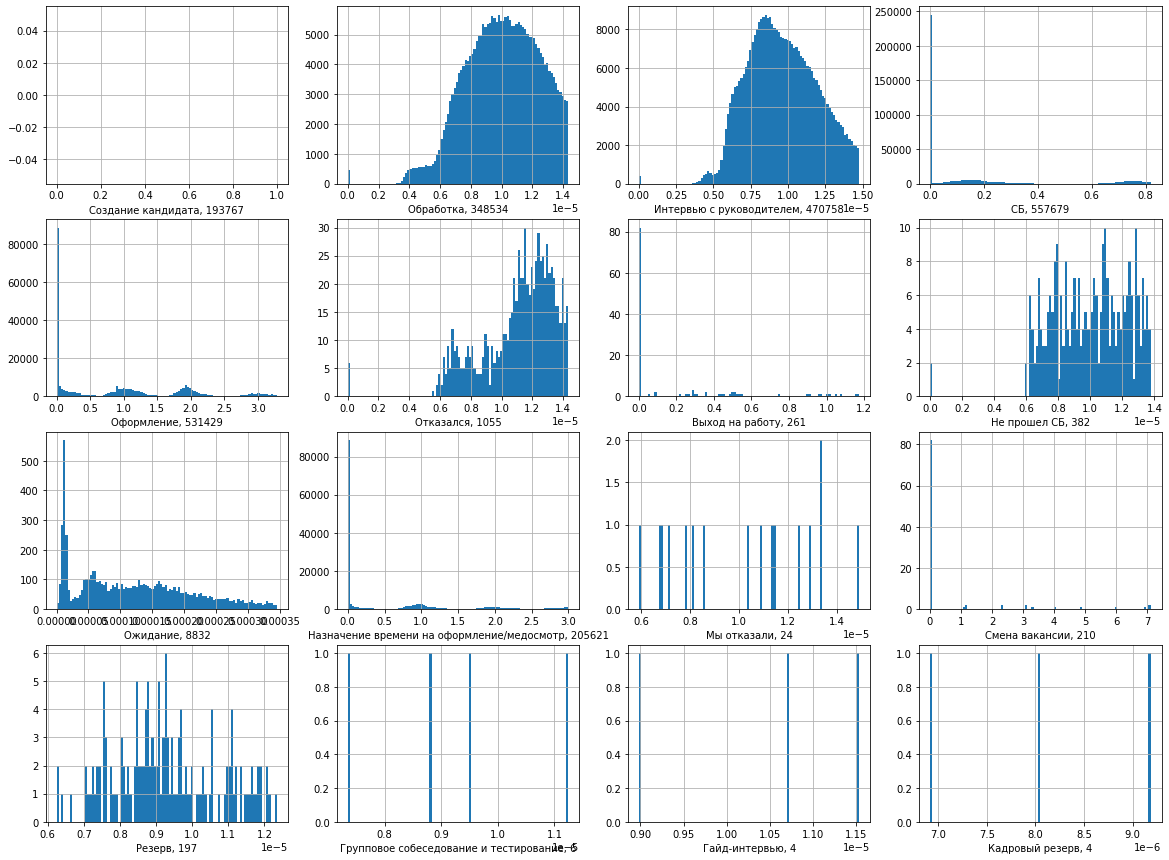

In [111]:
showHist(df_fits, stages_g, 'stage_name', stage_threshold)

.................

IndexError: index 4 is out of bounds for axis 0 with size 4

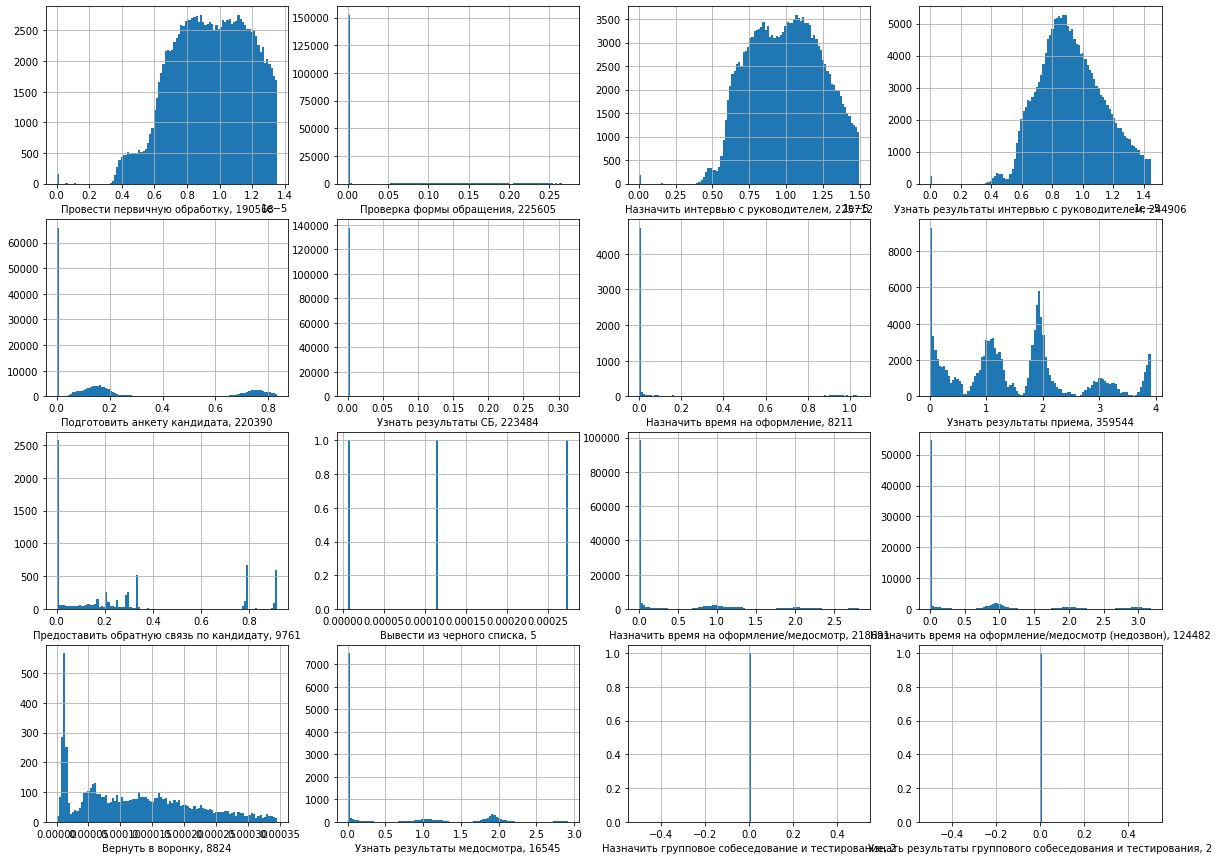

In [112]:
showHist(df_fits, activities_g, 'activity_name', activity_threshold, True)

.....................................

IndexError: index 6 is out of bounds for axis 0 with size 6

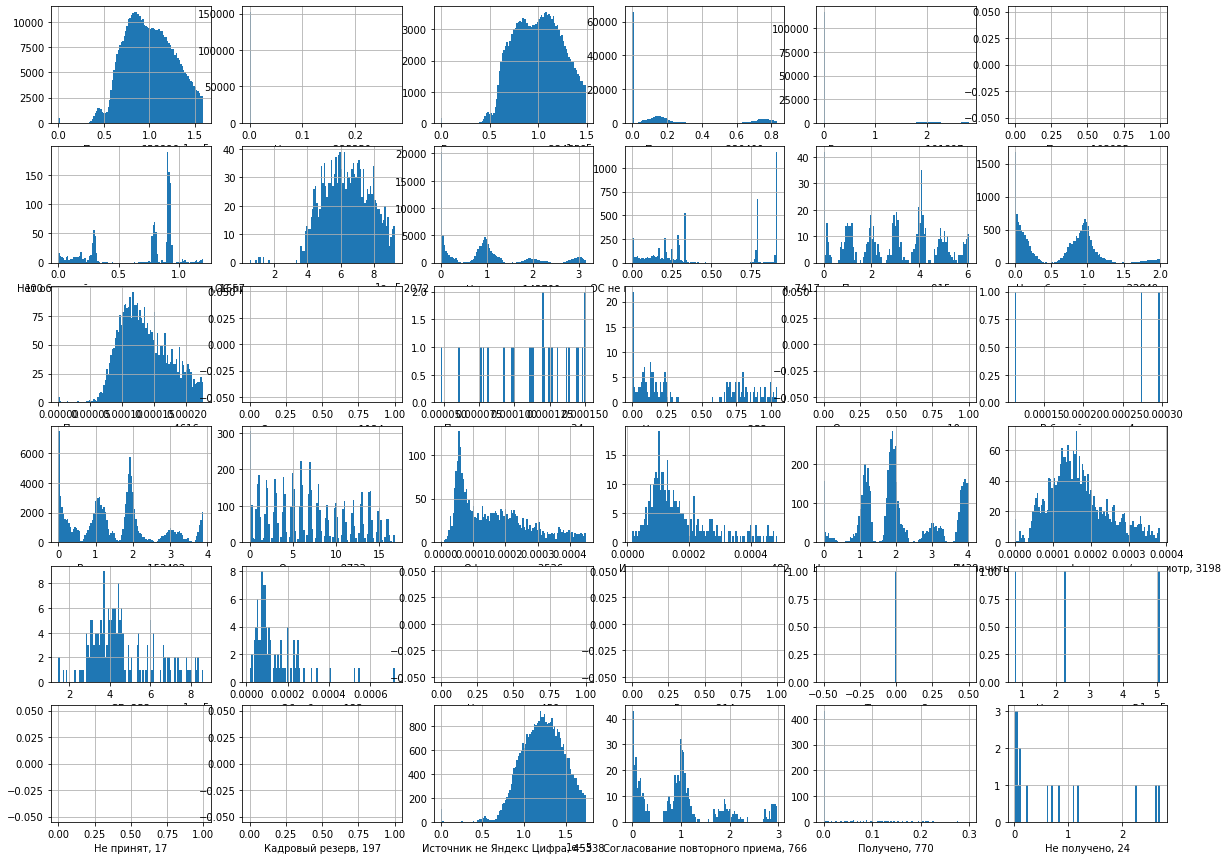

In [113]:
showHist(df_fits, results_g, 'result_name', result_threshold, True, 6)

# Замечание! 
заменить float значения колонки next_id на int

In [ ]:
#df2020["next_id"] = df2020["next_id"].astype(int) # пишет что не может NaN сконвертить в инт, тут надо подумать

In [ ]:
по stage_name других годов

In [ ]:
по stage_name 2020